In [107]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from astropy import constants as cst
from astropy import units as u
import healpy as hp

from aqn import *
from constants import *
from survey_parameters import *
from skymap_plotting_functions import *
from aqn_simulation import *

import sys
sys.path.append('../analysis')

from mcmc_models import *

In [108]:
def plot_cube(x, unit_label, save_name):
    resolution = np.shape(x)[0]
    voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
    voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
    z_slice_min, z_slice_max = [-0.05,0.05]
    mask = (voxel_centers[2] >= z_slice_min) & (voxel_centers[2] < z_slice_max)
    slice_count = np.average(x[:,:,mask], axis=2).value
    # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
    plt.figure(dpi=500)
    plt.imshow(slice_count, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm())
    
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(unit_label, fontsize=20)
    plt.xlabel('$x$ [kpc]', size=20)
    plt.ylabel('$y$ [kpc]', size=20)
    plt.xticks(np.array([-10,-5,0,5,10]),fontsize=15)
    plt.yticks(np.array([-10,-5,0,5,10]), fontsize=15)
    
    plt.title(save_name, size=20)
    
    # plt.savefig(save_name+".png", bbox_inches='tight')
    # plt.savefig(save_name+".svg", bbox_inches='tight')
    
    # plt.close()
    plt.show()


# def plot_cube_UV(x, unit_label, save_name):
#     resolution = np.shape(x)[0]
#     voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
#     voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
#     z_slice_min, z_slice_max = [-0.05,0.05]
#     mask = (voxel_centers[2] >= z_slice_min) & (voxel_centers[2] < z_slice_max)
#     slice_count = np.sum(x[:,:,mask], axis=2).value
#     # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
#     plt.figure(dpi=500)
#     plt.imshow(slice_count, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm())
    
#     cbar = plt.colorbar()
#     cbar.ax.tick_params(labelsize=15)
#     cbar.set_label(unit_label, fontsize=20)
#     plt.xlabel('$x$ [kpc]', size=20)
#     plt.ylabel('$y$ [kpc]', size=20)
#     plt.xticks(np.array([-7.4,-7.6,-7.8,-8,-8.2,-8.4,-8.6]),fontsize=15)
#     # plt.xticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]), fontsize=15)
#     plt.yticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]), fontsize=15)
#     plt.xlim([-7.4, -8.6])
#     plt.ylim([-0.6,0.6])
#     # plt.xlim([-0.6,0.6])
#     plt.title(save_name, size=20)
    
#     # plt.savefig(save_name+".png", bbox_inches='tight')
#     # plt.savefig(save_name+".svg", bbox_inches='tight')
    
#     # plt.close()
#     plt.show()

def plot_cube_UV(x, unit_label, save_name):
    resolution = np.shape(x)[0]
    voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
    voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
    x_slice_min, x_slice_max = [-8,-7.4]
    mask = (voxel_centers[0] >= x_slice_min) & (voxel_centers[0] < x_slice_max)
    slice_count = np.sum(x[mask,:,:], axis=0).value # !!!!!
    # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
    plt.figure(dpi=500)
    plt.imshow(slice_count, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm())
    
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=15)
    cbar.set_label(unit_label, fontsize=20)
    plt.xlabel('$y$ [kpc]', size=20)
    plt.ylabel('$z$ [kpc]', size=20)
    plt.xticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]),fontsize=15)
    plt.yticks(np.array([-0.6,-0.4,-0.2,0,0.2,0.4,0.6]), fontsize=15)
    plt.xlim([-0.6,0.6])
    plt.ylim([-0.6,0.6])
    
    plt.title(save_name, size=20)
    
    plt.savefig("../visuals/"+save_name+".png", bbox_inches='tight')
    plt.savefig("../visuals/"+save_name+".svg", bbox_inches='tight')
    
    # plt.close()
    plt.show()

# def plot_cube(x, unit_label, save_name):
#     resolution = np.shape(x)[0]
#     voxel_centers = np.reshape(grid_coords, (resolution, resolution, resolution, 3))[0][:,0,0]
#     voxel_centers = np.array([voxel_centers, voxel_centers, voxel_centers])
#     z_slice_min, z_slice_max = [-1,1]
#     mask = (voxel_centers[0] >= z_slice_min) & (voxel_centers[0] < z_slice_max)
#     slice_count = np.average(x[mask,:,:], axis=0).value
#     # slice_count[slice_count==0] = np.min(slice_count[slice_count>0])
#     plt.figure(dpi=500)
#     plt.imshow(slice_count.T, extent=[-10, 10, -10, 10], norm = matplotlib.colors.LogNorm(),
#               origin='lower')
    
#     cbar = plt.colorbar()
#     cbar.ax.tick_params(labelsize=15)
#     cbar.set_label(unit_label, fontsize=20)
#     plt.xlabel('$y$ [kpc]', size=20)
#     plt.ylabel('$z$ [kpc]', size=20)
#     plt.xticks(np.array([-10,-5,0,5,10]),fontsize=15)
#     plt.yticks(np.array([-10,-5,0,5,10]), fontsize=15)
    
#     plt.title(save_name, size=20)
    
#     plt.savefig(save_name+".png", bbox_inches='tight')
#     plt.savefig(save_name+".svg", bbox_inches='tight')
    
#     # plt.close()
#     plt.show()

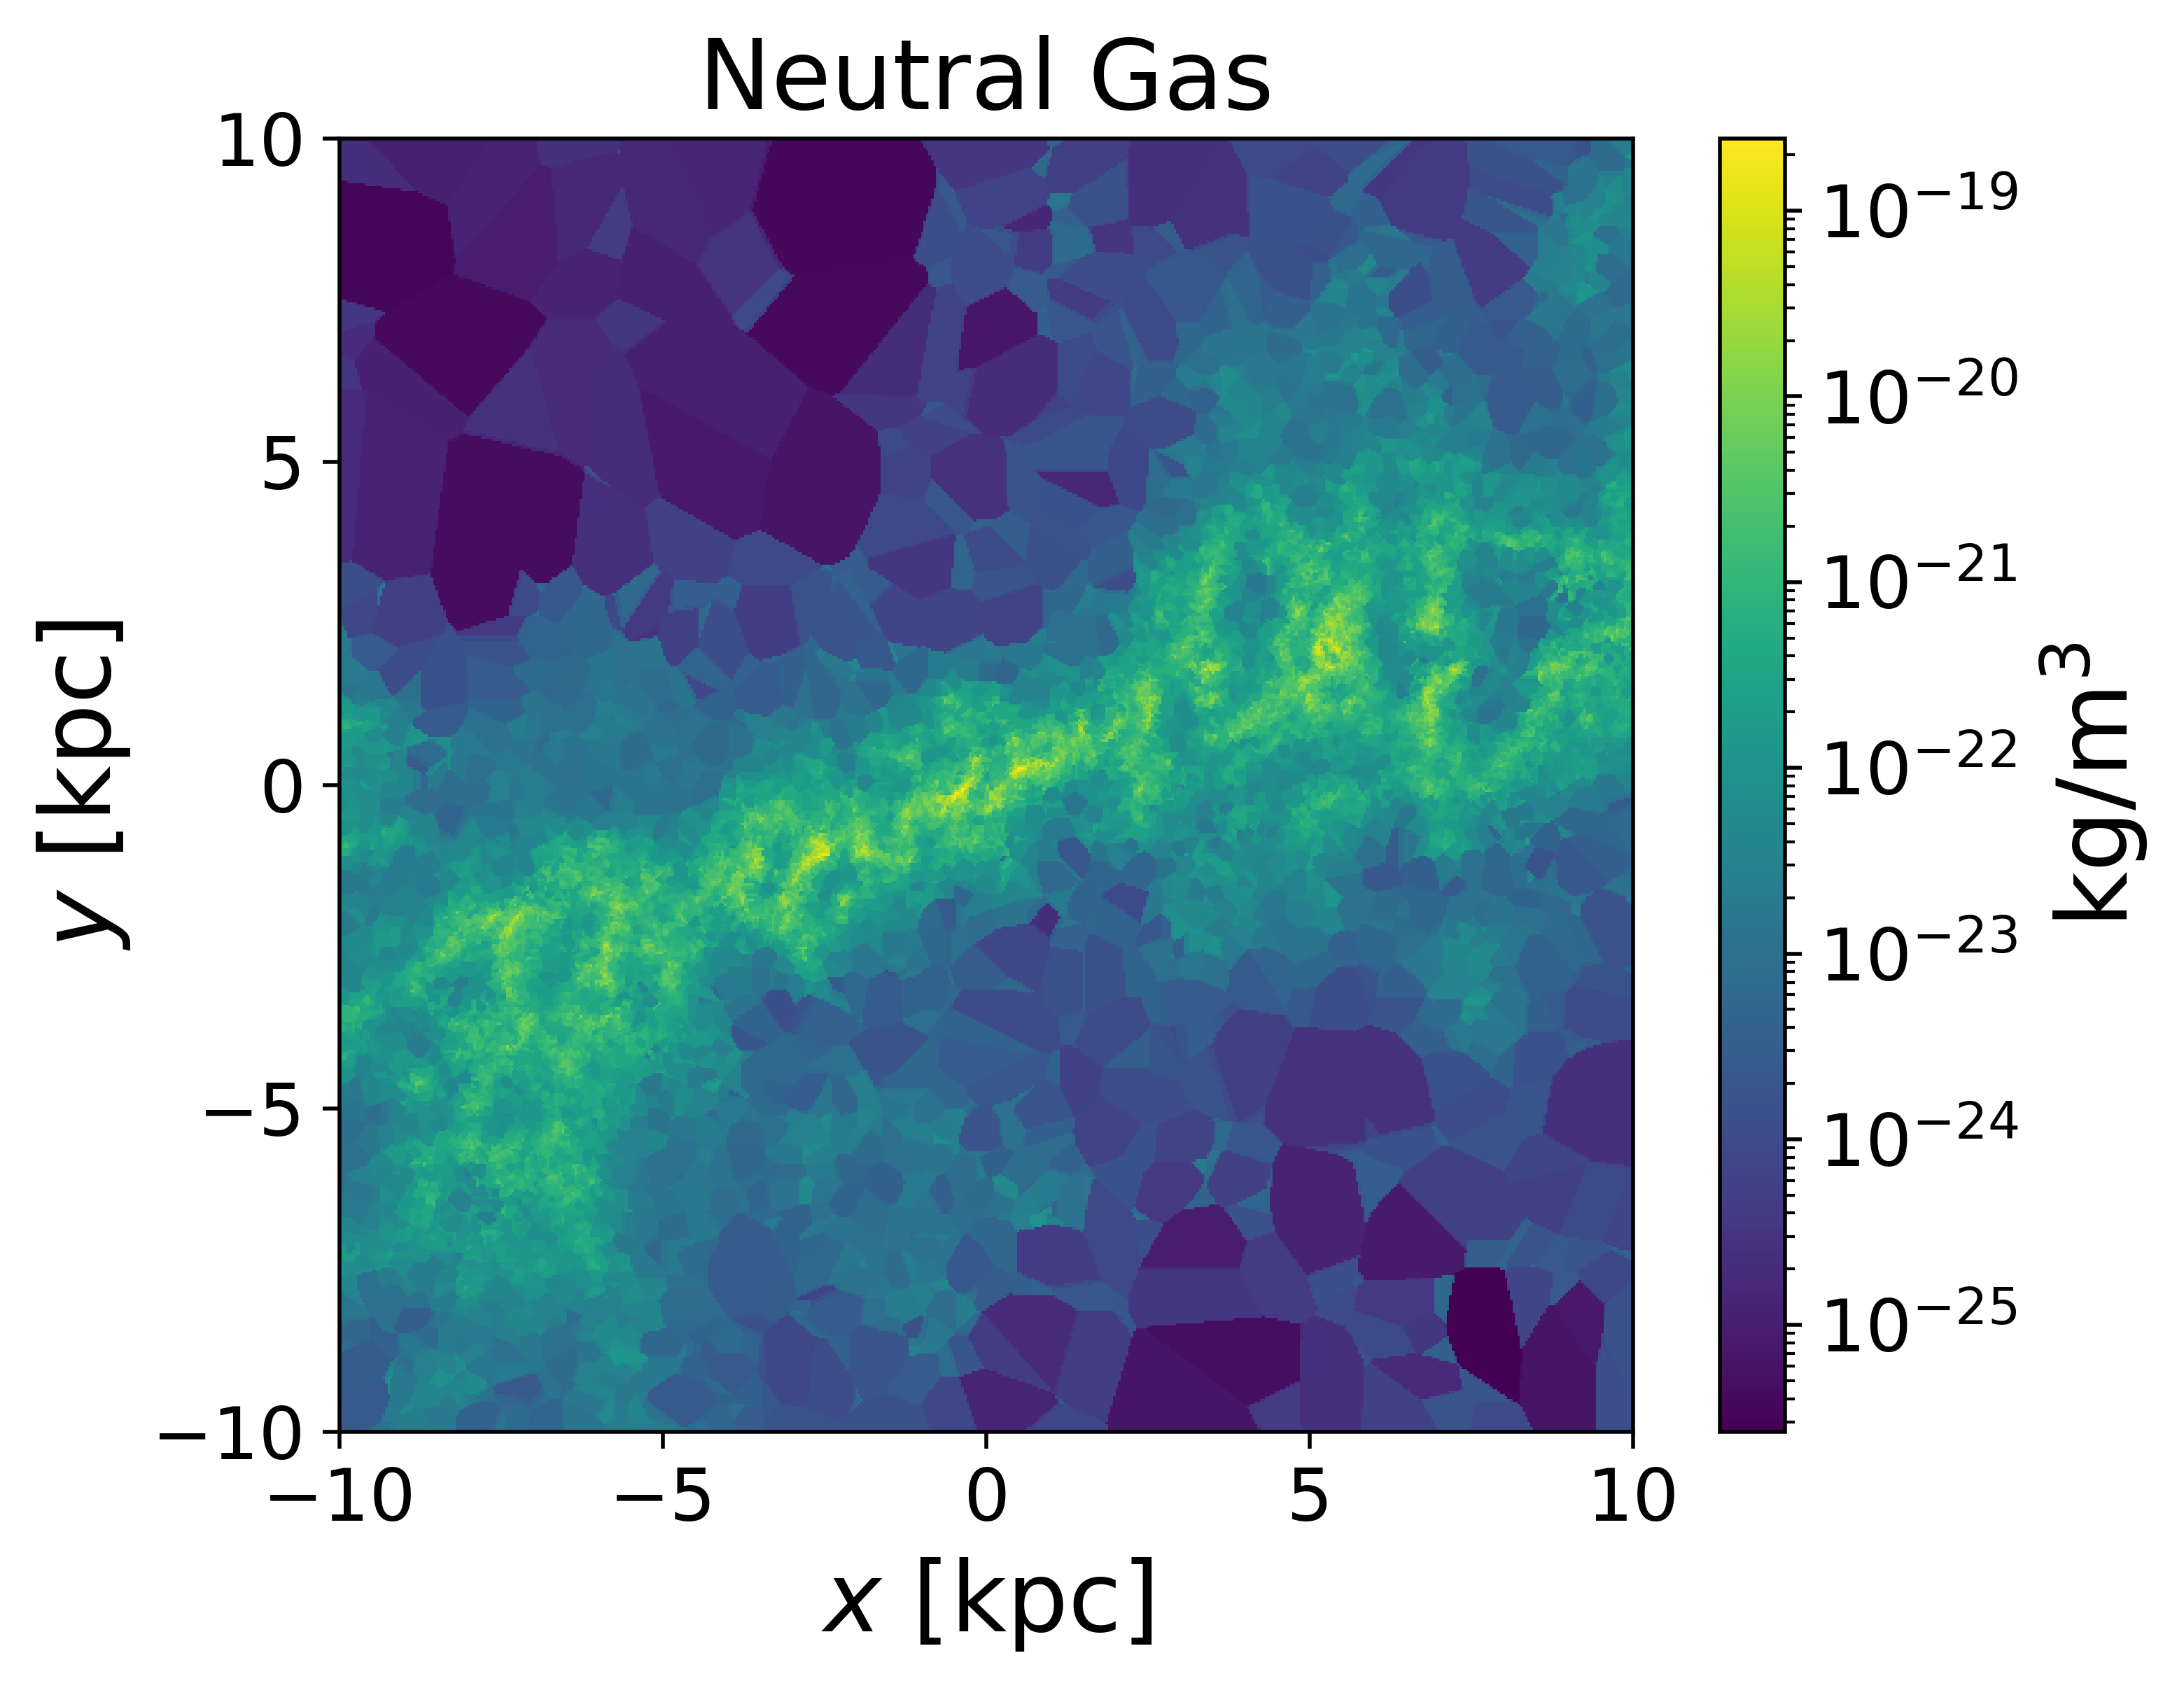

In [110]:
plot_cube(cubes["neut_gas"], r'kg/m$^3$', "Neutral Gas")

In [3]:
cube_dimension = np.shape(cubes["aqn_emit"])[0]
flat_aqn_emit  = np.reshape(cubes["aqn_emit"],(cube_dimension**3))
f_aqn = np.sum(flat_aqn_emit[cube_indexes], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

NameError: name 'cubes' is not defined

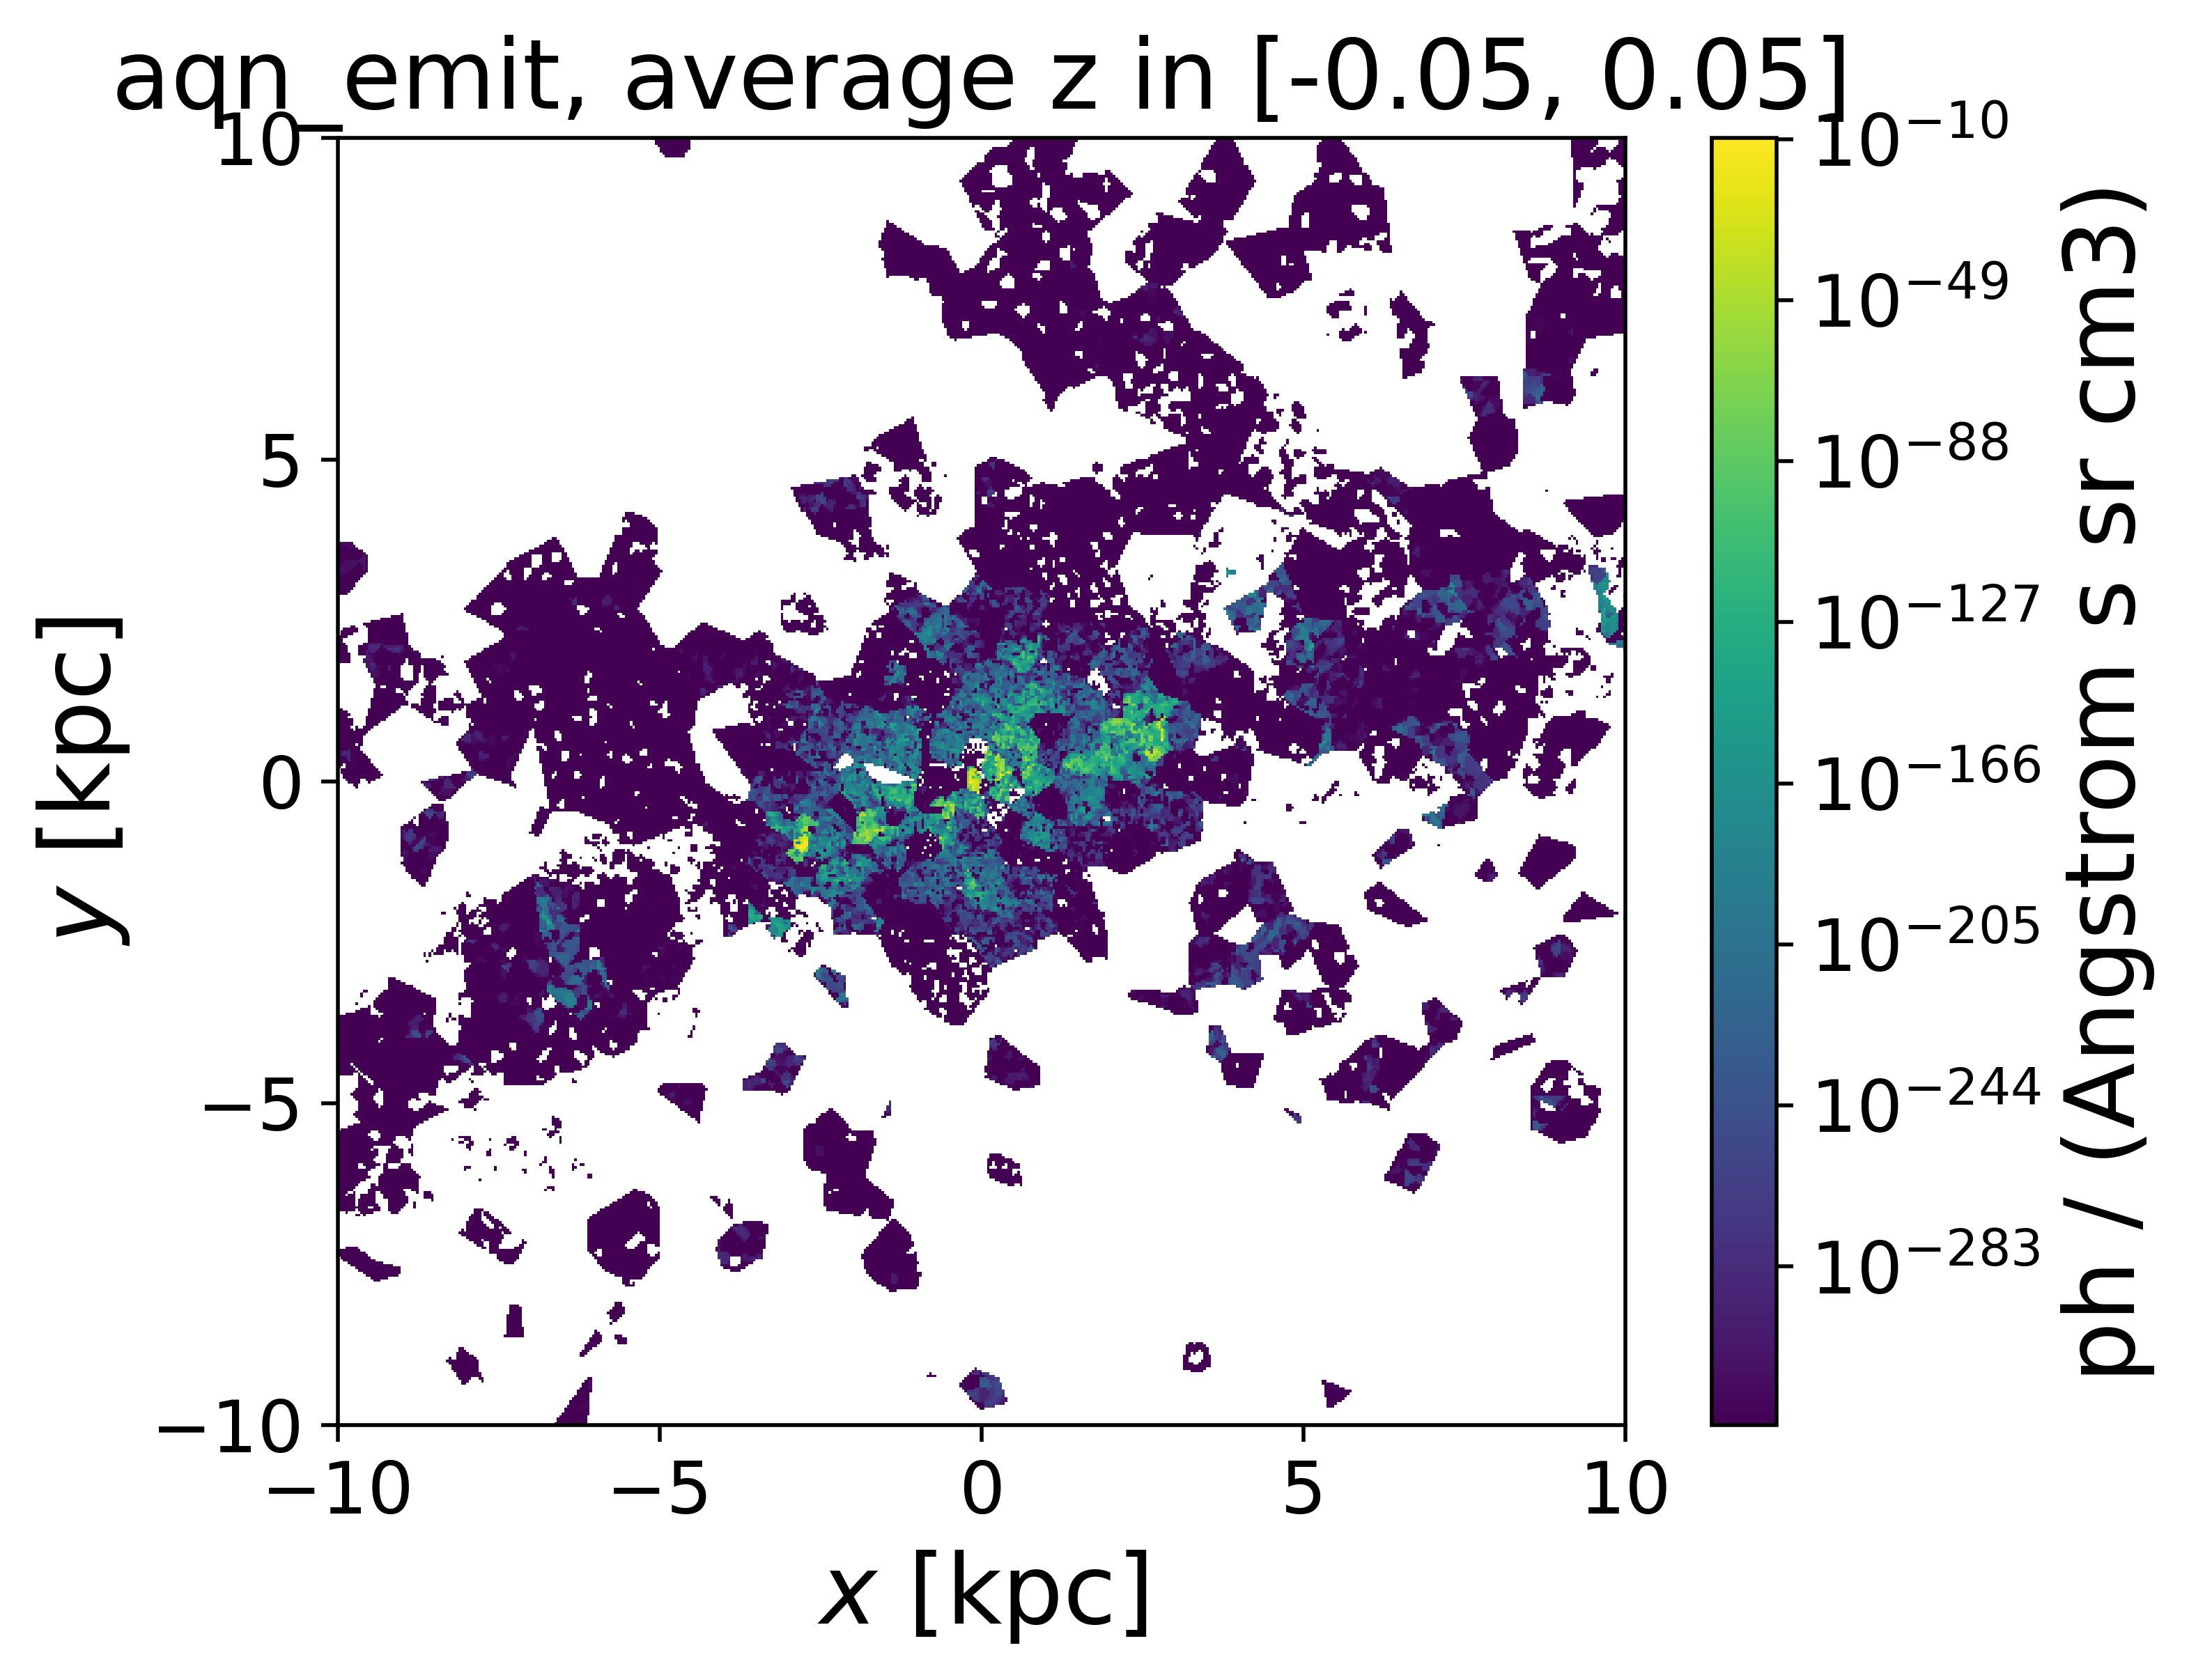

In [33]:
plot_cube(cubes["aqn_emit"], cubes["aqn_emit"].unit, "aqn_emit, average z in [-0.05, 0.05]")

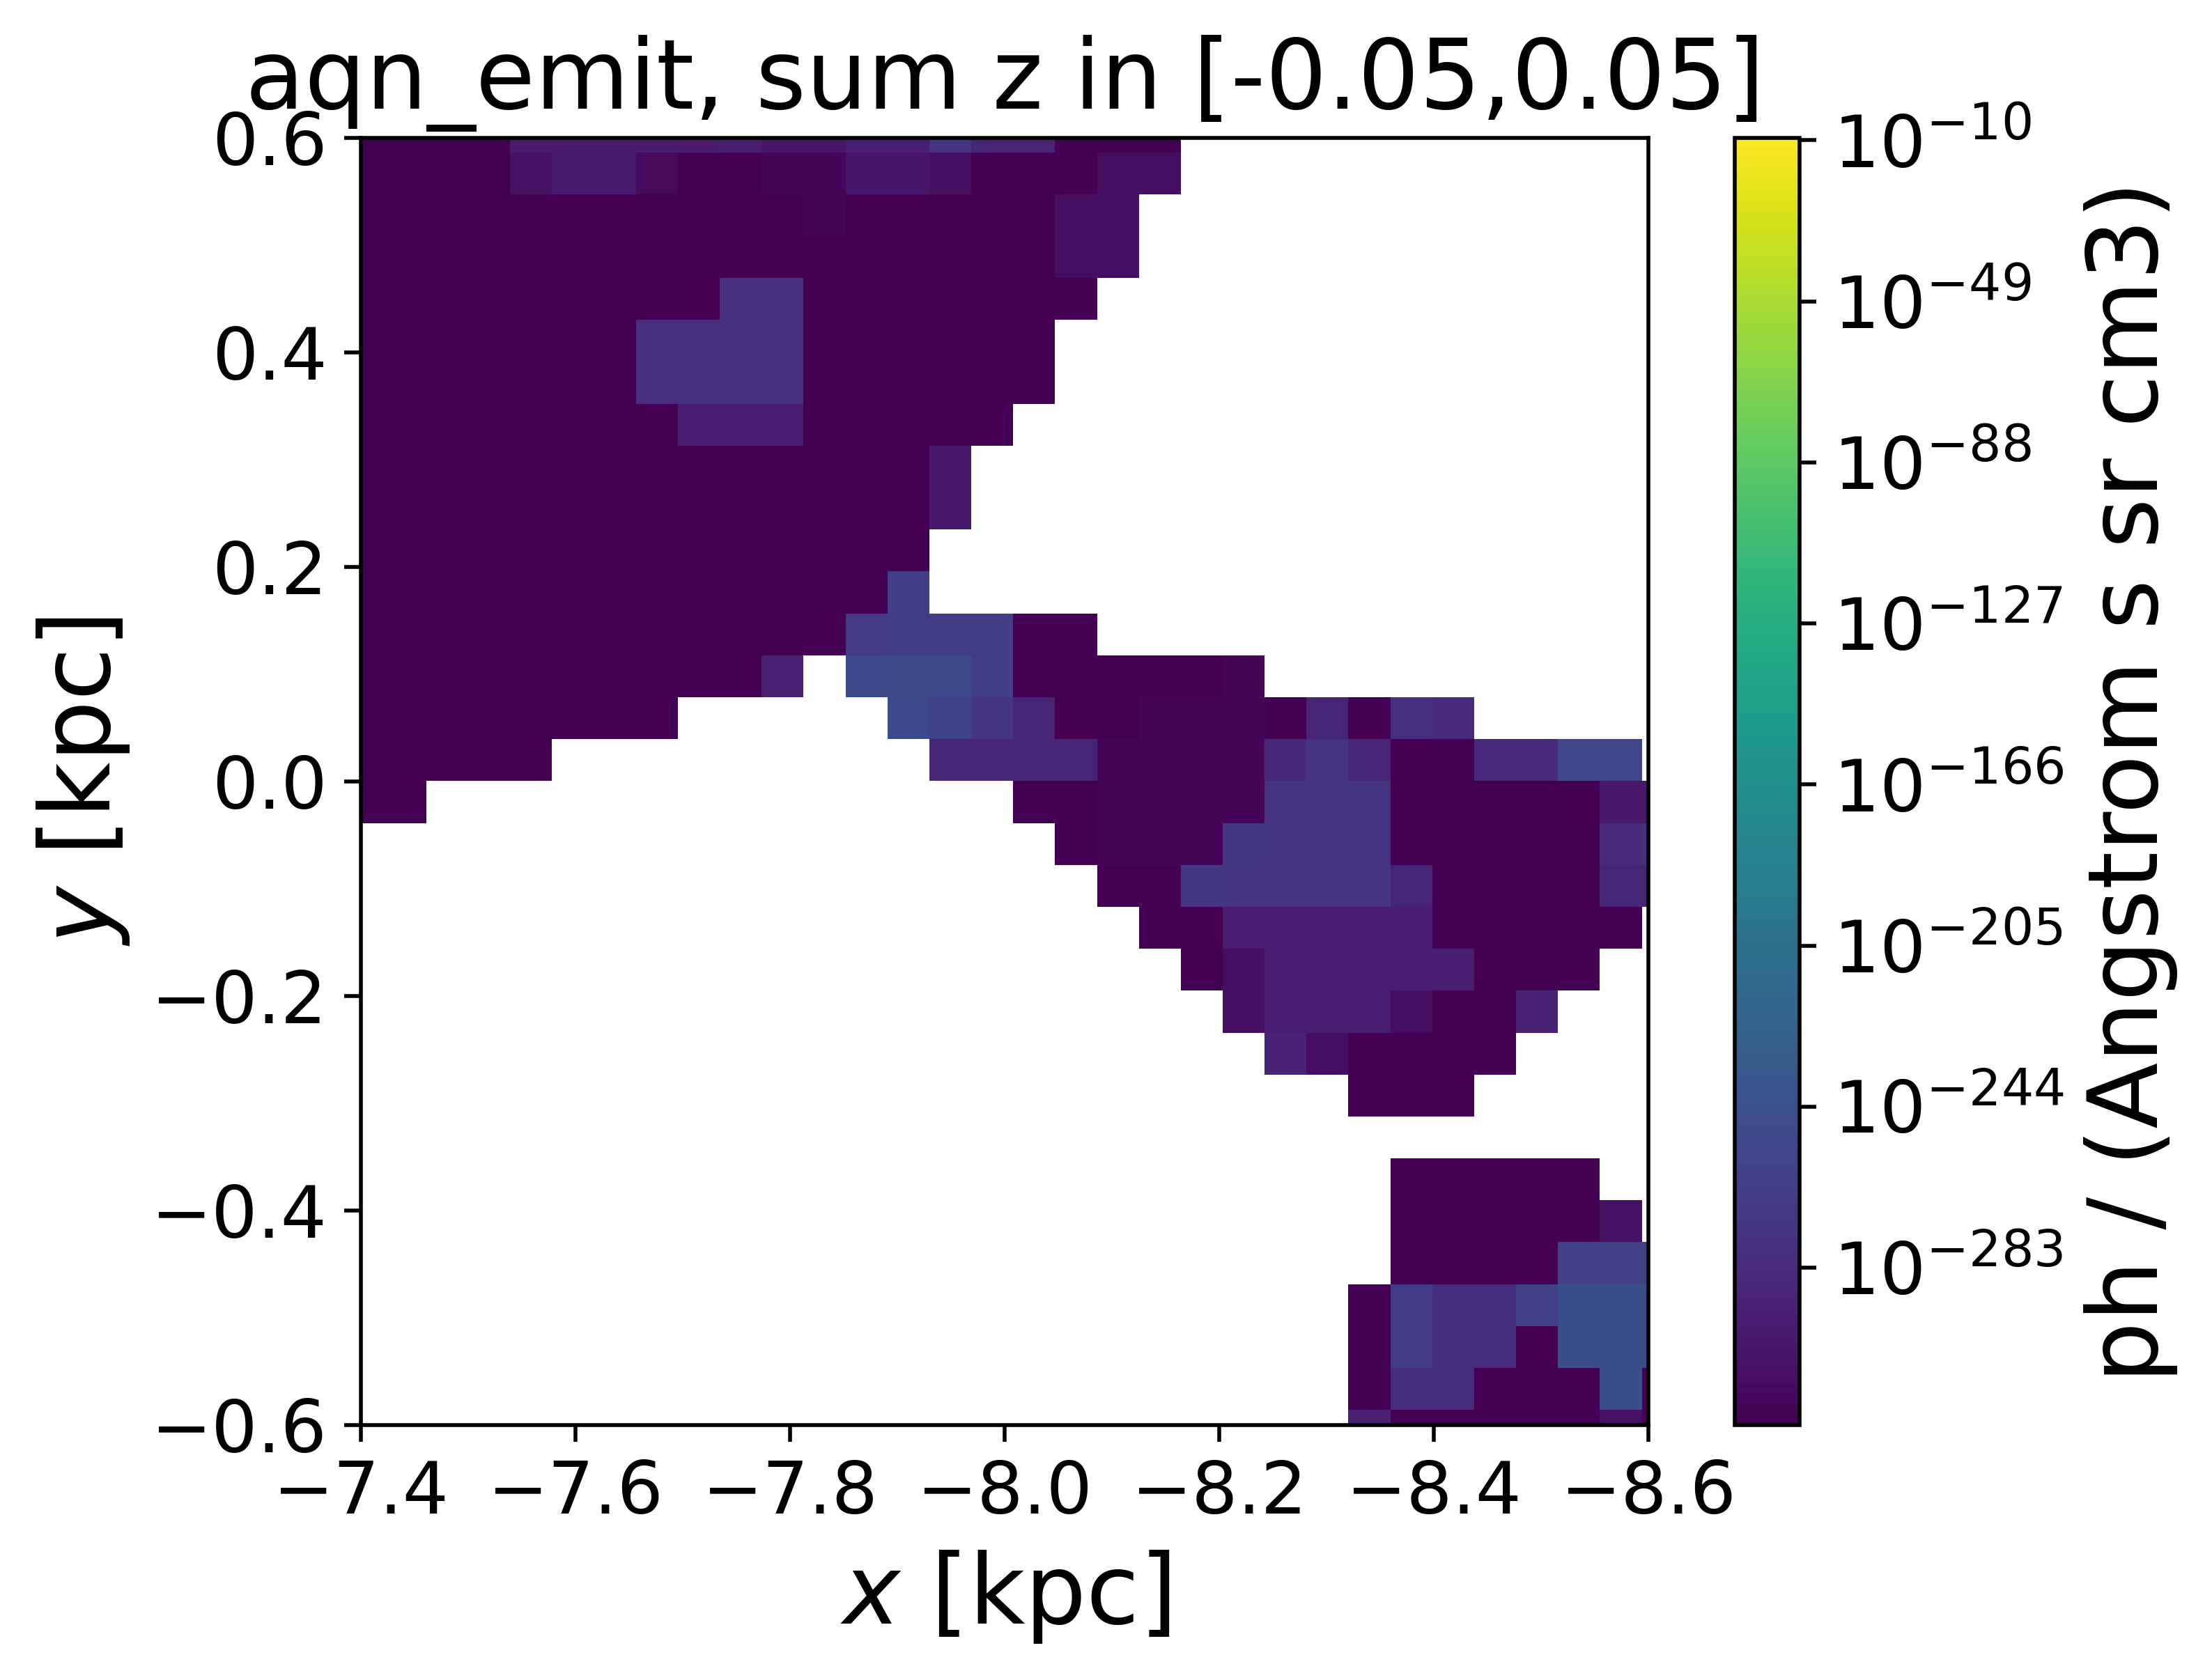

In [35]:
plot_cube_UV(cubes["aqn_emit"], cubes["aqn_emit"].unit, "aqn_emit, sum z in [-0.05,0.05]")

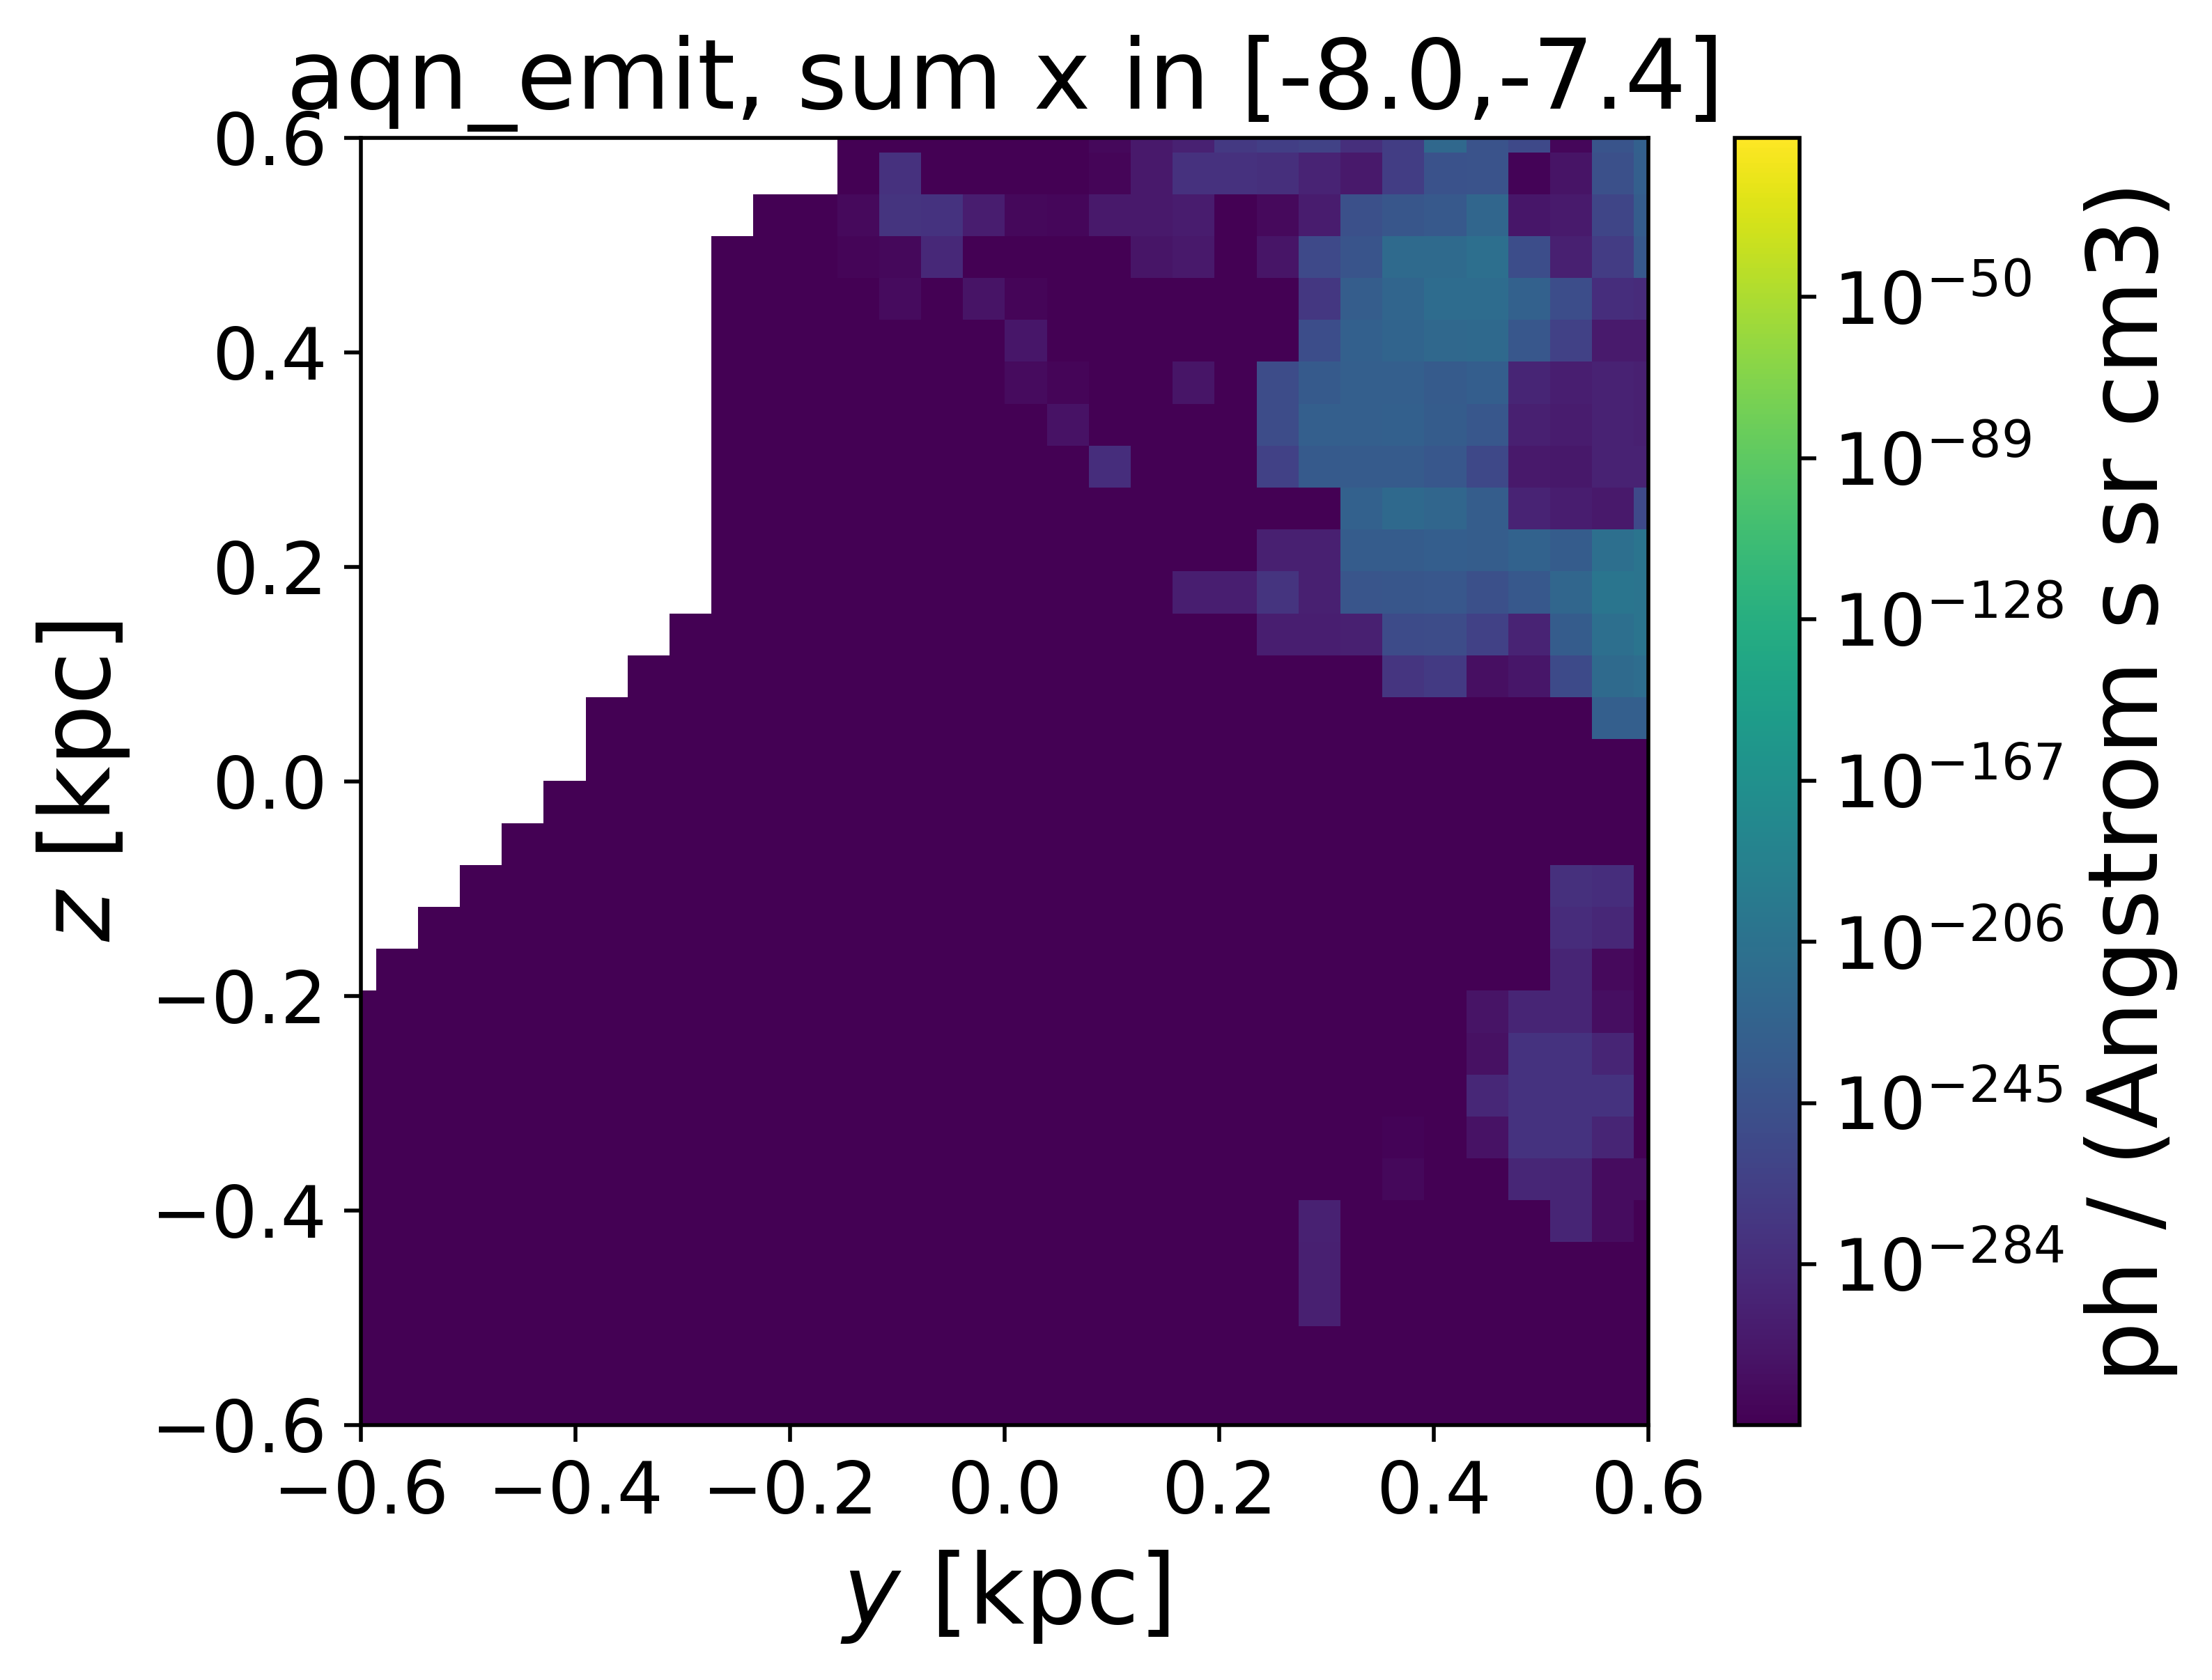

In [51]:
plot_cube_UV(cubes["aqn_emit"], cubes["aqn_emit"].unit, "aqn_emit, sum x in [-8.0,-7.4]")

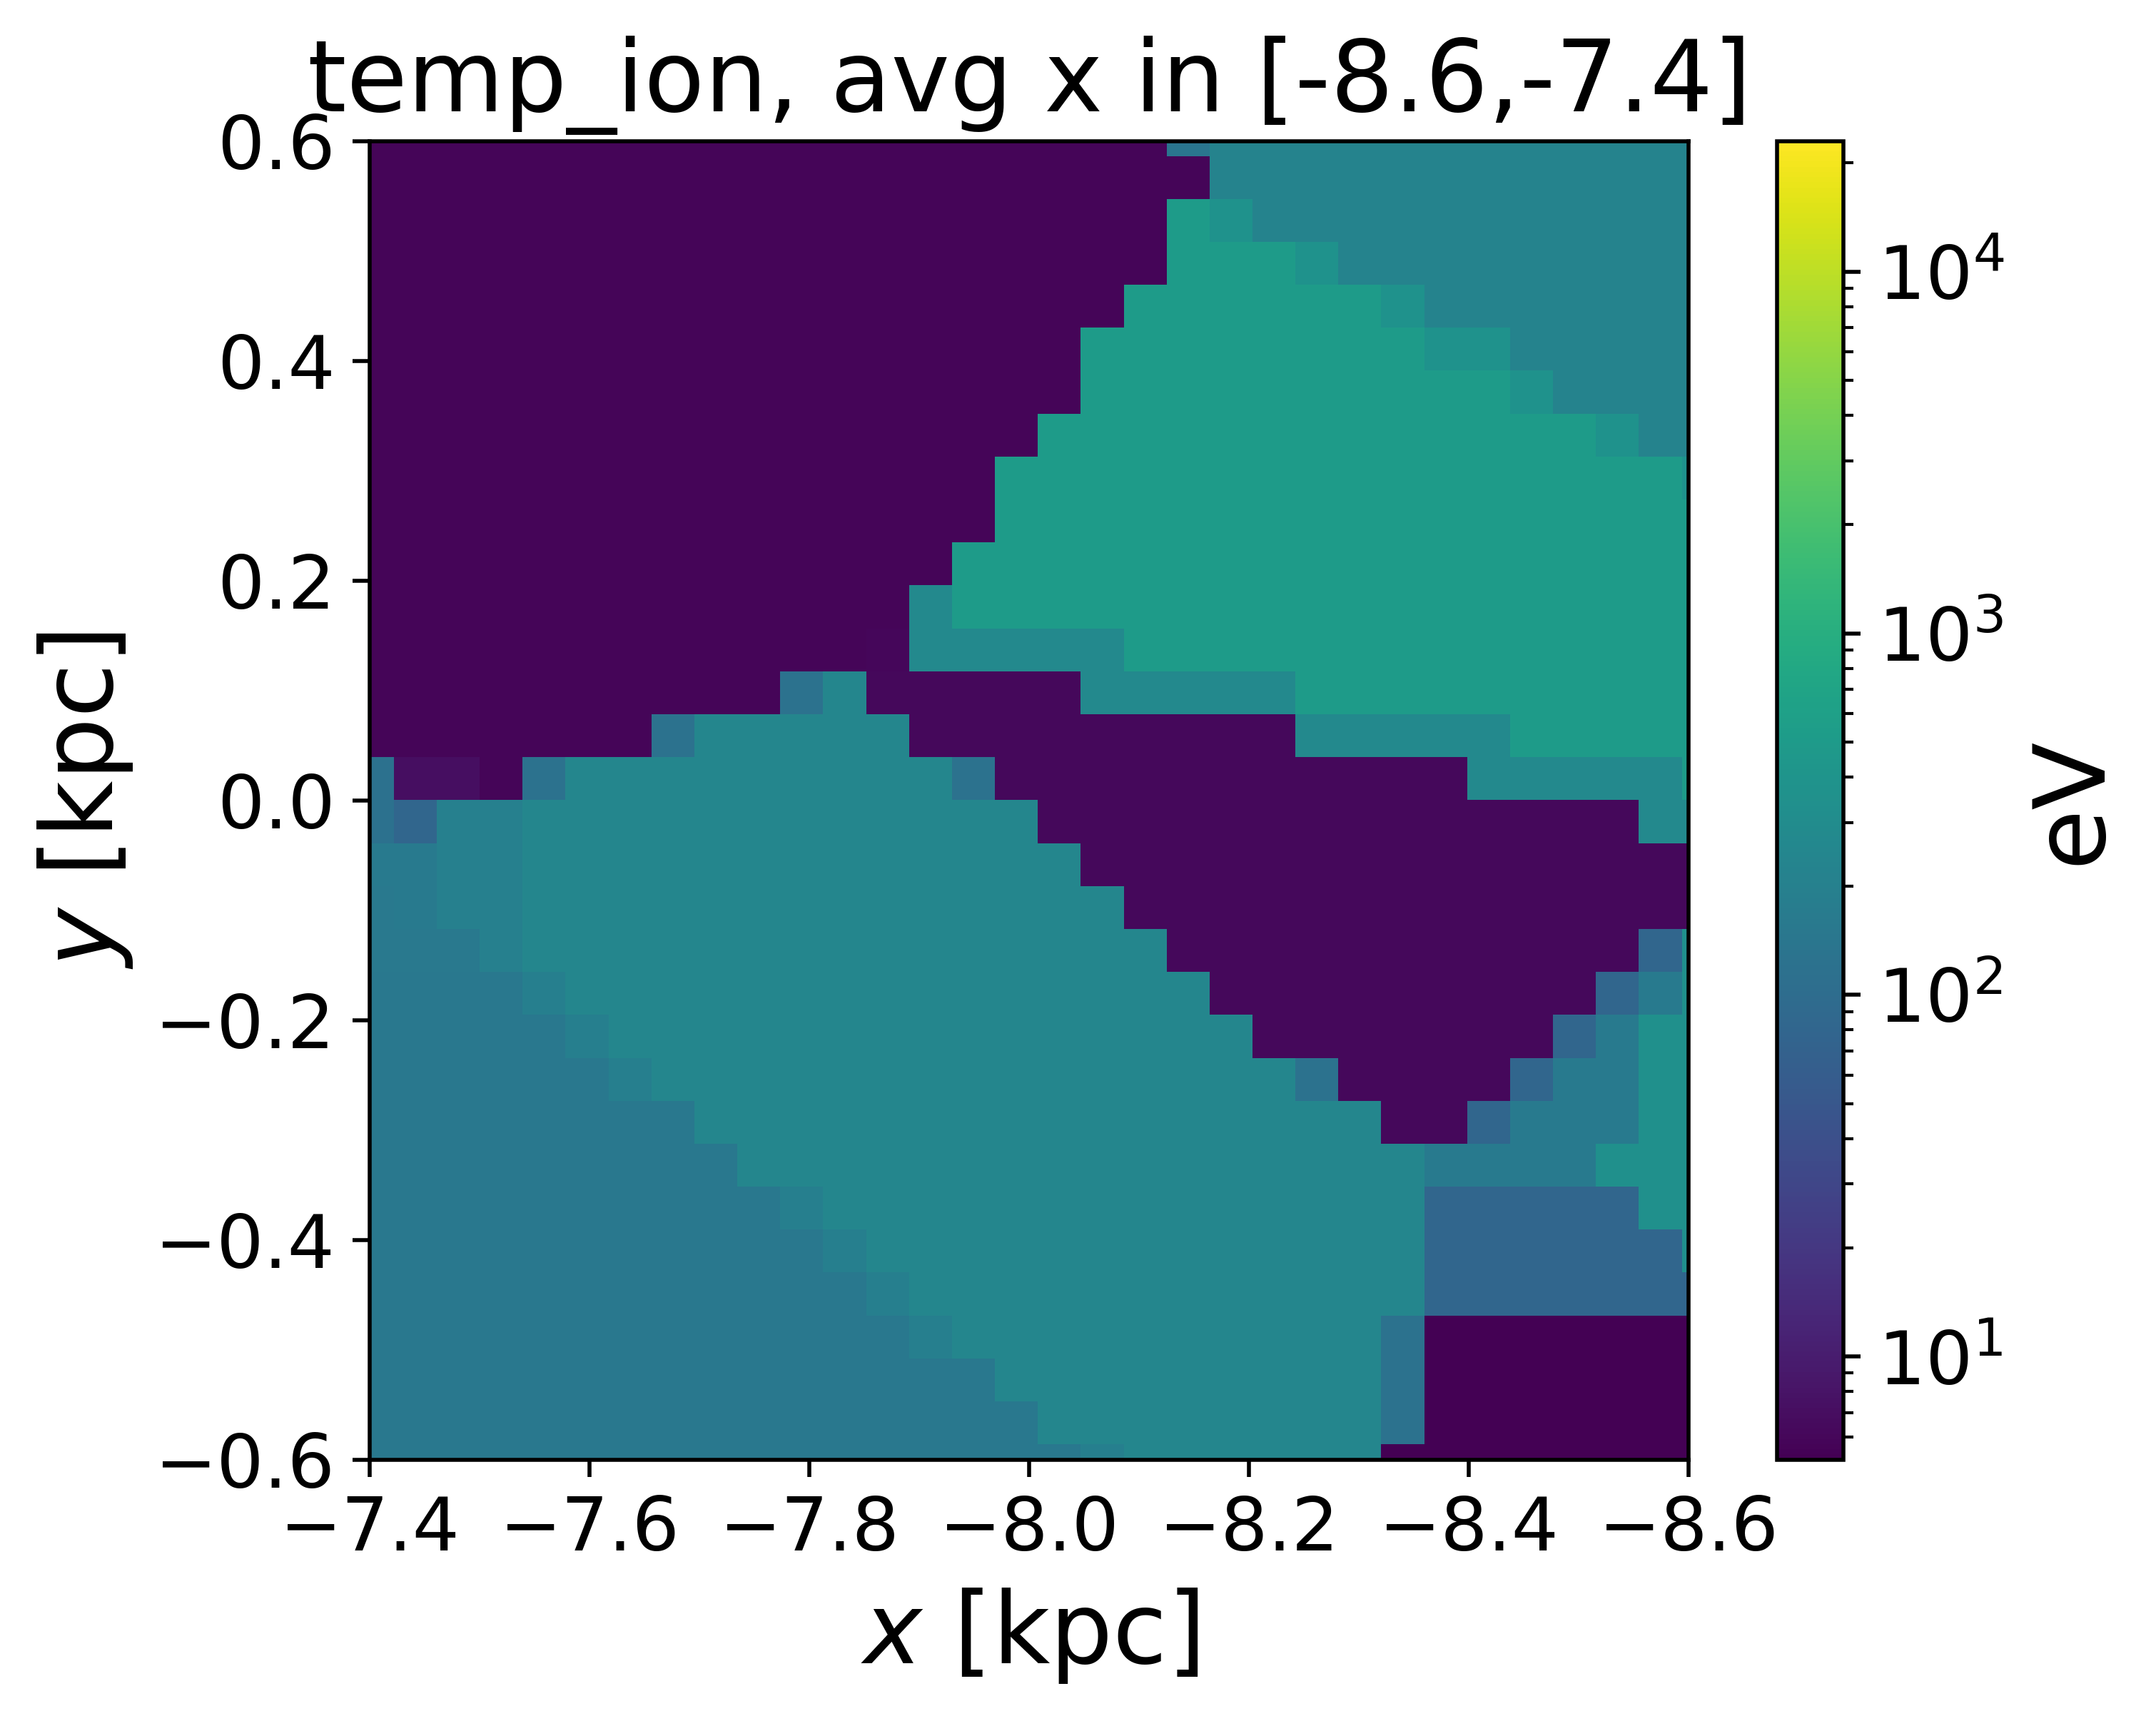

In [188]:
plot_cube_UV(cubes["temp_ion"], cubes["temp_ion"].unit, "temp_ion, avg x in [-8.6,-7.4]")

In [30]:
cub = cubes["aqn_emit"].value
cube_dimension = np.shape(cubes["aqn_emit"])[0]
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)

flat_cub  = np.reshape(cub,(cube_dimension**3))
flat_cub[np.where(flat_cub == flat_cub[cube_indexes[:,centre_index]][3])] = 1e-15

cub = np.reshape(flat_cub,(cube_dimension, cube_dimension ,cube_dimension))

In [47]:
ff = np.reshape(cubes["aqn_emit"].value,(cube_dimension**3))
ff[cube_indexes[:,centre_index]]


array([3.34341882e-19, 2.62193187e-16, 2.62193187e-16, 2.62193187e-16,
       9.75064843e-16, 9.75064843e-16, 9.75064843e-16, 9.75064843e-16,
       3.98363592e-52, 3.98363592e-52, 3.98363592e-52, 3.98363592e-52,
       3.98363592e-52, 3.98363592e-52, 3.98363592e-52, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 7.10581032e-54,
       7.10581032e-54, 7.10581032e-54, 7.10581032e-54, 8.49536771e-46,
       8.49536771e-46, 8.49536771e-46, 8.49536771e-46, 2.77527699e-49,
       2.77527699e-49, 2.77527699e-49, 2.77527699e-49, 2.77527699e-49,
       2.77527699e-49, 2.77527699e-49, 2.77527699e-49, 1.35411546e-17,
       1.35411546e-17, 1.35411546e-17, 1.35411546e-17, 1.35411546e-17,
       1.35411546e-17, 1.35411546e-17, 1.35411546e-17, 1.35411546e-17,
      

In [43]:
flat_cub[cube_indexes[:,centre_index]]


array([3.34341882e-19, 1.00000000e-15, 1.00000000e-15, 1.00000000e-15,
       9.75064843e-16, 9.75064843e-16, 9.75064843e-16, 9.75064843e-16,
       3.98363592e-52, 3.98363592e-52, 3.98363592e-52, 3.98363592e-52,
       3.98363592e-52, 3.98363592e-52, 3.98363592e-52, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 8.59822427e-49,
       8.59822427e-49, 8.59822427e-49, 8.59822427e-49, 7.10581032e-54,
       7.10581032e-54, 7.10581032e-54, 7.10581032e-54, 8.49536771e-46,
       8.49536771e-46, 8.49536771e-46, 8.49536771e-46, 2.77527699e-49,
       2.77527699e-49, 2.77527699e-49, 2.77527699e-49, 2.77527699e-49,
       2.77527699e-49, 2.77527699e-49, 2.77527699e-49, 1.35411546e-17,
       1.35411546e-17, 1.35411546e-17, 1.35411546e-17, 1.35411546e-17,
       1.35411546e-17, 1.35411546e-17, 1.35411546e-17, 1.35411546e-17,
      

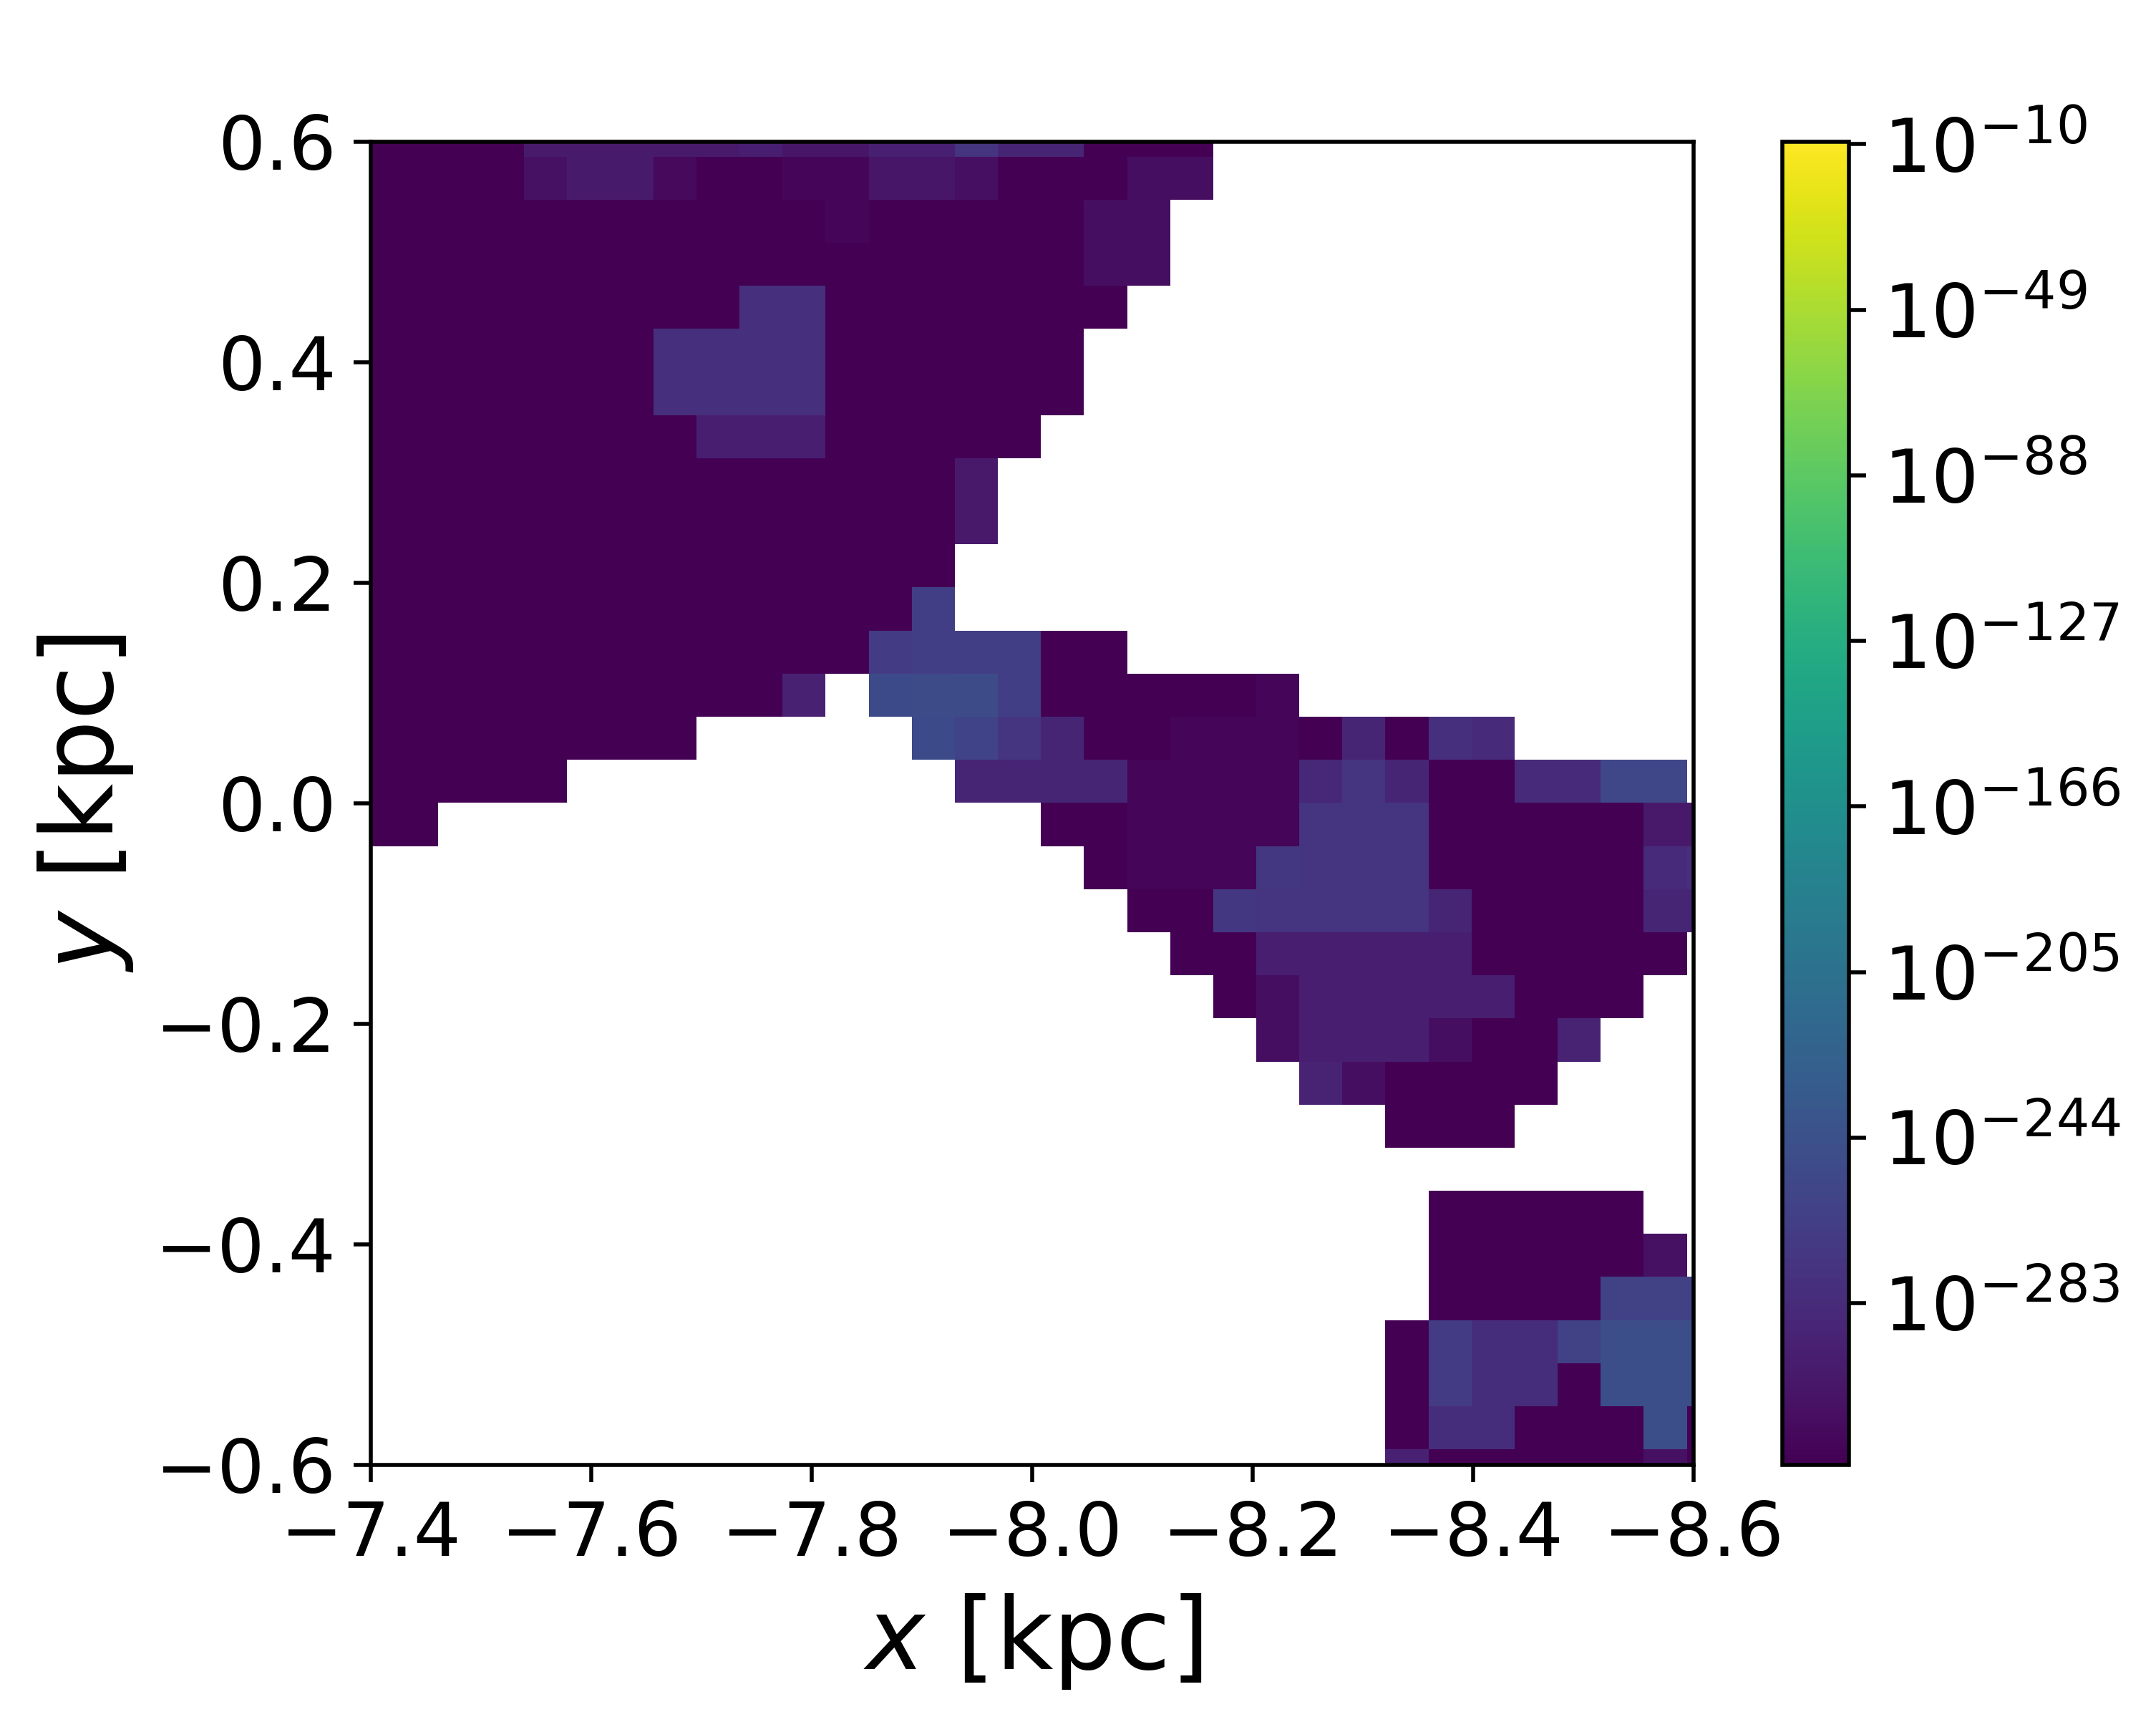

In [32]:
plot_cube_UV(cub*u.K, "", "  ")

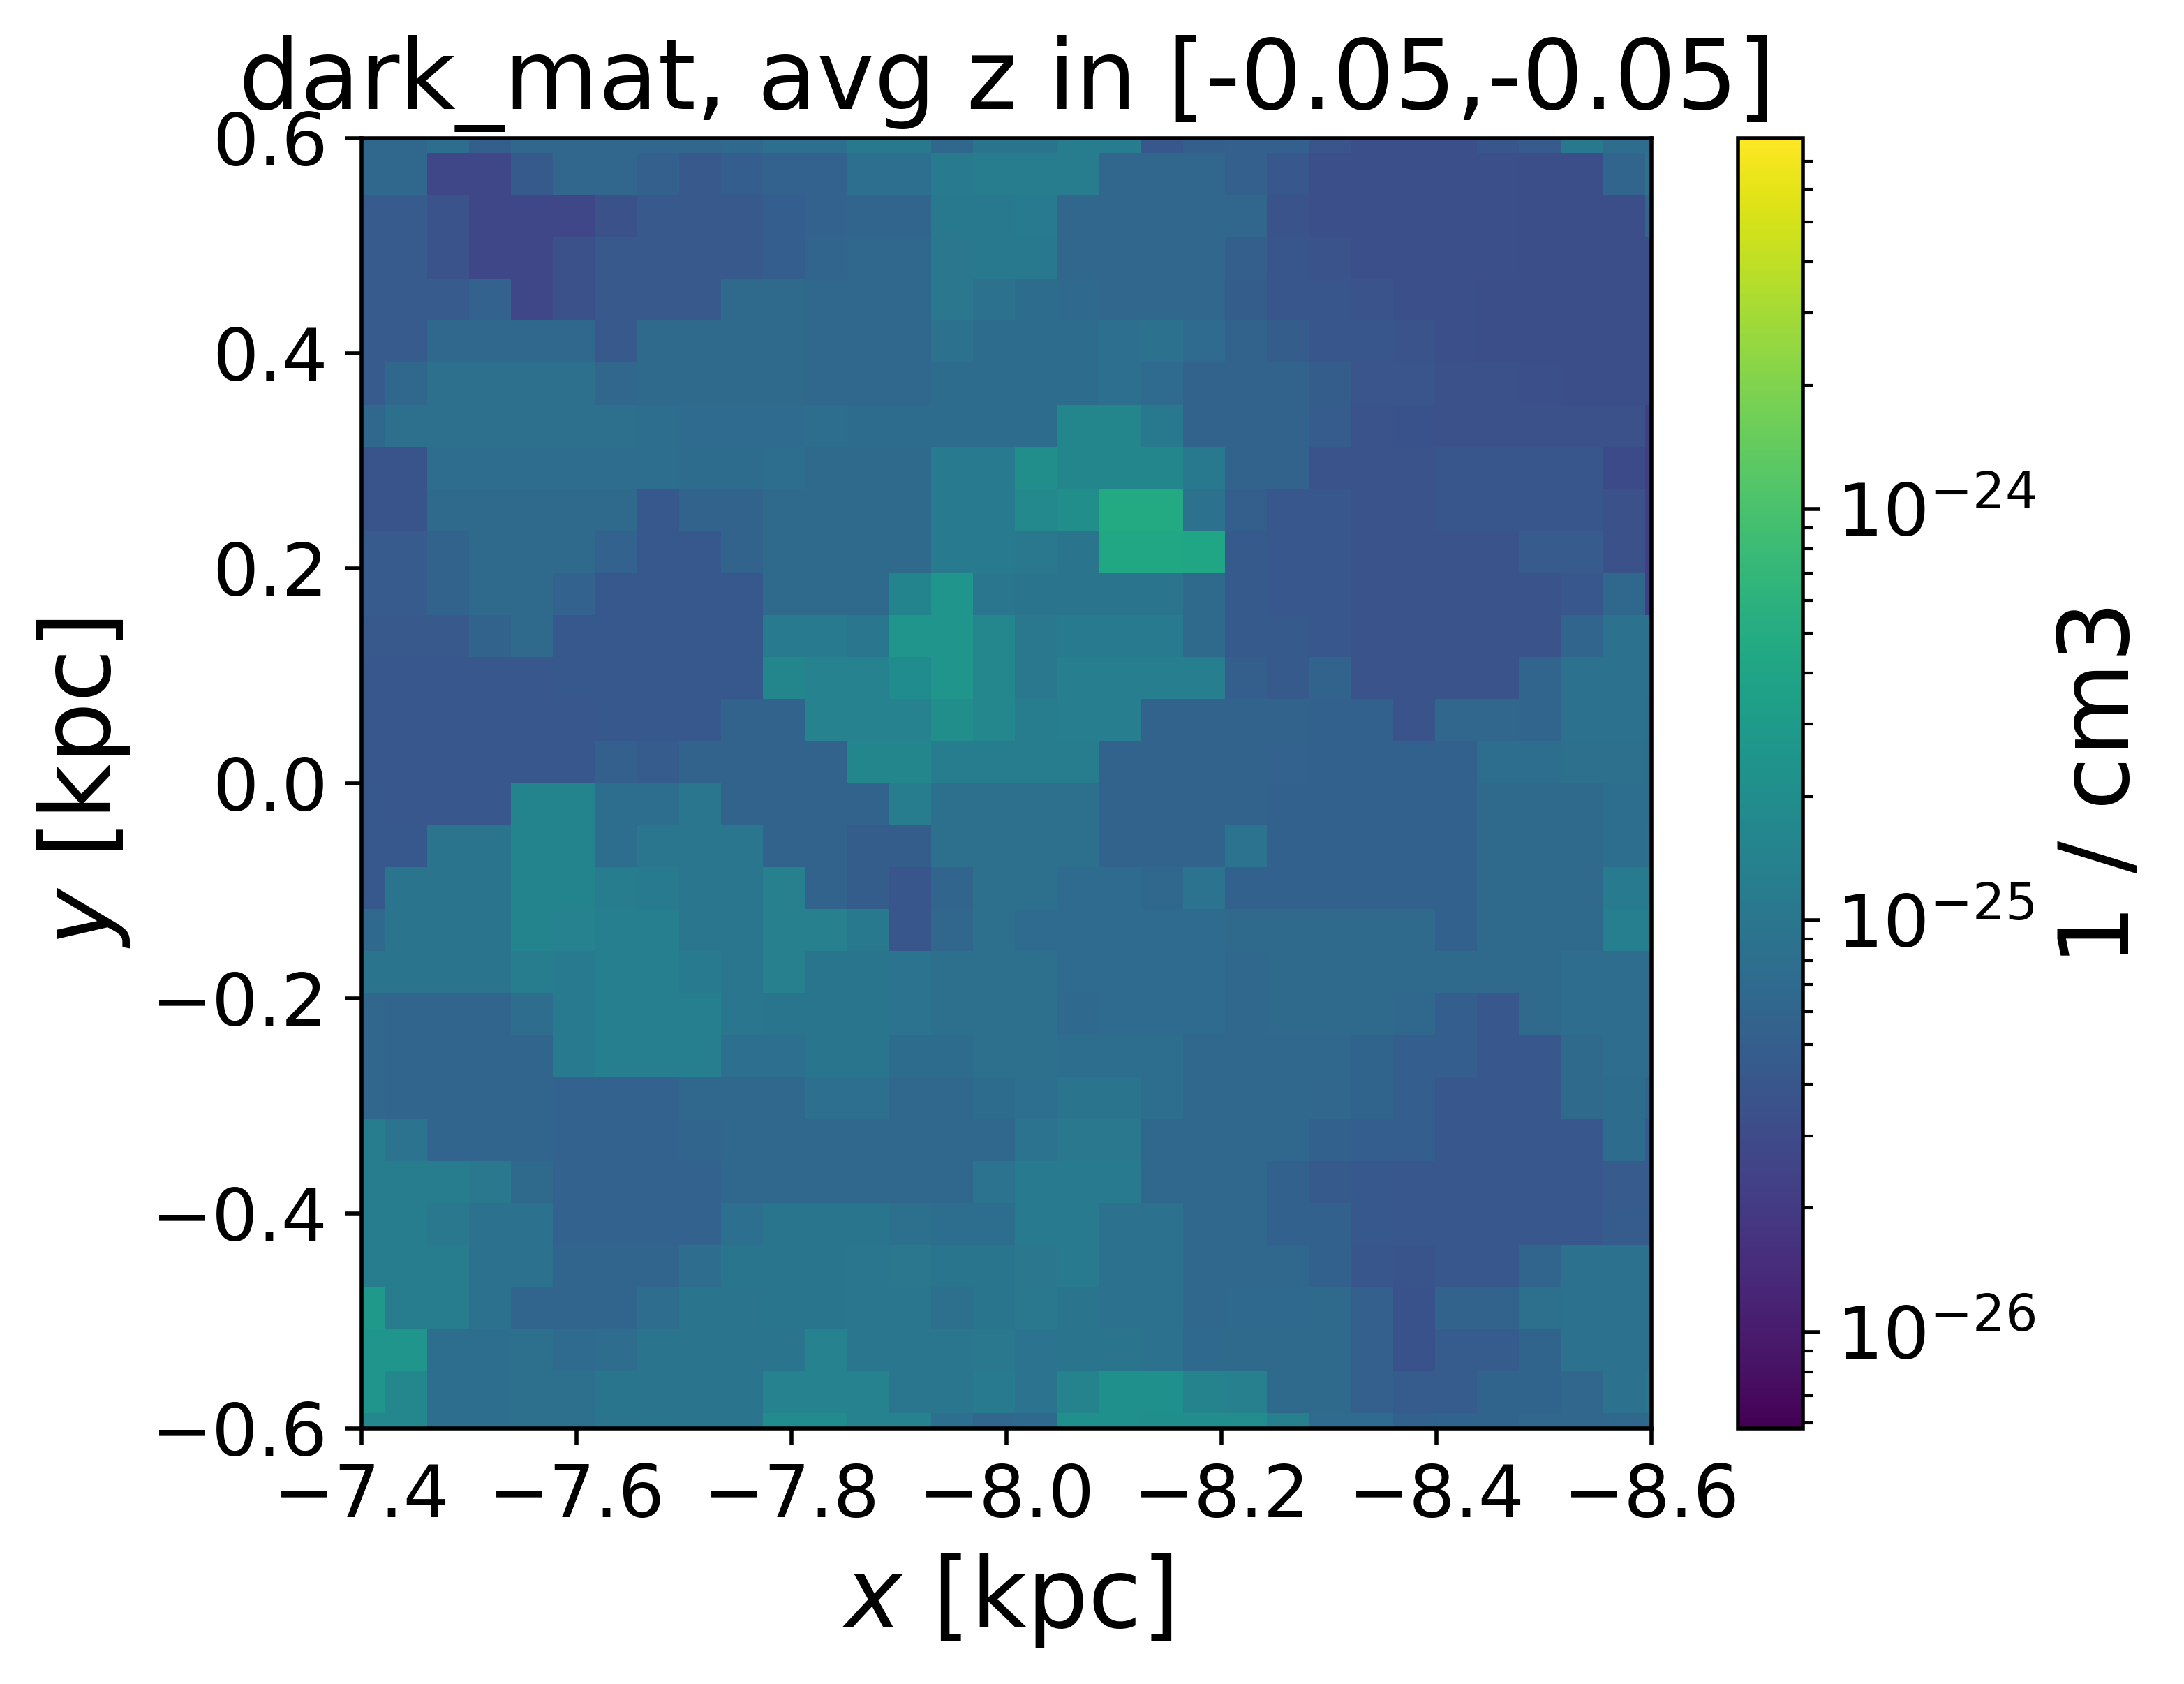

In [133]:
plot_cube_UV(cubes["dark_mat"], cubes["dark_mat"].unit, "dark_mat, avg z in [-0.05,0.05]")

# Define AQN parameters

In [4]:
# define AQN parameters
m_aqn_kg = 0.01*u.kg
R_aqn_cm = calc_R_AQN(m_aqn_kg)

print("using m_aqn =", m_aqn_kg)
print("using R_aqn =", R_aqn_cm)

using m_aqn = 0.01 kg
using R_aqn = 1.8964778823564563e-05 cm


# Define survey parameters

In [5]:
# specify frequency resolution and create frequency band array
# Change frequency range within survey_parameters.py
frequency_band_resolution = 1e14 # 1e9 for WMAP, 1e14 for GALEX
frequency_band = np.arange(f_min_hz.value, f_max_hz.value, frequency_band_resolution) * u.Hz

len(frequency_band)

6

# Define simulation resolution

In [6]:
sun_mw_distance_kpc = 8*u.kpc
NSIDE = 2**5
NPIX = hp.nside2npix(NSIDE)
dOmega = hp.nside2pixarea(nside=NSIDE)

# Prepare arrays for integration

In [7]:
# array of theta, phi, for each pixel
theta, phi = hp.pix2ang(nside = NSIDE, ipix = list(range(NPIX)))
dl =  0.01 * u.kpc
l_min, l_max = 0, 0.6 # np.max(distances) = 17.2867 kpc
l_list = np.arange(l_min,l_max,dl.value)[:, np.newaxis]
# 2D array of distance elements along each sightline
l = np.ones((len(l_list),len(theta))) * l_list

# (l,theta,phi) -> (x,y,z)
x = l * np.sin(theta) * np.cos(phi) - sun_mw_distance_kpc.value
y = l * np.sin(theta) * np.sin(phi)
z = l * np.cos(theta)

R = np.sqrt(x**2 + y**2 + z**2)

# Compute analytical models

In [8]:
cubes = {}
cubes["dark_mat"] = (rho_dark_mat(R, [19.60758081904341, 1.081829387522867, 
                                    2.207828893849368, 1.831142772499595, 
                                    0.06711443461154958])*u.kg/u.m**3/  m_aqn_kg).to(1/u.cm**3)
cubes["ioni_gas"] = (rho_ioni_gas(R, [6.521713155920115 , 0.2940077939925656, 
                                    29.072973590609415, 1.6812716453492722, 
                                    3.9044895415071528, 3.4656473013927394, 
                                    1.43427732961435])*u.kg/u.m**3/cst.m_p.si).to(1/u.cm**3) 
cubes["neut_gas"] = (rho_neut_gas(R, [8.97656111186945  ,2.213270305404448 ,
                                    13.875013340031673,1.5018739204854163,
                                    2.58047607932149  ,1.1680782169590678,29.693878727525025])*u.kg/u.m**3/cst.m_p.si).to(1/u.cm**3)
cubes["temp_ion"] = rho_temp(R, [6.14, 0.3, 1.5, 0.1, 3.3, 0.1]) * u.K * K_to_eV
cubes["dv_ioni"]  = rho_dv_ioni(R, [0.7594266933349966, 2.73608605904013, 
                                     2.5582050186794847, 1.004084602553337, 
                                     1.6631635389592465, 17.152525652652074, 
                                     2.7163675354935055]) * u.m/u.s /cst.c
cubes["dv_neut"]  = rho_dv_neut(R, [0.7817275122369671, 1.4514477940369448, 
                                     7.670255389377027 , 
                                     2.7444837892336853]) * u.m/u.s /cst.c

In [31]:
9e4*K_to_eV

<Quantity 7.75559994 eV / K>

# Compute using data cubes

In [89]:
# import cubes and grid_coords
grid_coords = np.load("../data/FIRE/grid-coords.npy")
grid_ids = np.load("../data/FIRE/grid-ids---dark_mat.npy")

cubes = {}
cubes["dark_mat"] = np.load("../data/FIRE/cubes/cube-dark_mat_density.npy") * u.kg/u.m**3
cubes["ioni_gas"] = np.load("../data/FIRE/cubes/cube-ioni_gas_density.npy") * u.kg/u.m**3
cubes["neut_gas"] = np.load("../data/FIRE/cubes/cube-neut_gas_density.npy") * u.kg/u.m**3
cubes["temp_ion"] = np.load("../data/FIRE/cubes/cube-ioni_gas_temp.npy") * u.K
cubes["dv_ioni"]  = np.load("../data/FIRE/cubes/cube-dv_ioni.npy") * u.m/u.s
cubes["dv_neut"]  = np.load("../data/FIRE/cubes/cube-dv_neut.npy") * u.m/u.s

# # compute distance from every grid centre to galactic centre
distances = np.sqrt(np.sum(grid_coords**2, axis=1)) * u.kpc

In [40]:
np.max(cubes["temp_ion"])

<Quantity 1.73707795e+08 K>

In [20]:
# perform some unit conversions
cubes["ioni_gas"] = (cubes["ioni_gas"]/cst.m_p.si).to(1/u.cm**3)
cubes["neut_gas"] = (cubes["neut_gas"]/cst.m_p.si).to(1/u.cm**3)
cubes["dark_mat"] = (cubes["dark_mat"]/  m_aqn_kg).to(1/u.cm**3)
cubes["temp_ion"] =  cubes["temp_ion"]*K_to_eV
cubes["dv_ioni"]  =  cubes["dv_ioni"] /cst.c
cubes["dv_neut"]  =  cubes["dv_neut"] /cst.c

In [42]:
# replace temp_ion cube with analytical calculation
# cubes["temp_ion"] = rho_temp(distances.value, [6.14, 0.3, 1.5, 0.1, 3.3, 0.1]) * u.K * K_to_eV
# cubes["temp_ion"] = np.reshape(cubes["temp_ion"], (cube_dimension, cube_dimension, cube_dimension))

NameError: name 'cube_dimension' is not defined

In [70]:
np.shape(cubes["temp_ion"])

(512, 512, 512)

# Calculate spectral spatial emissivity

In [21]:
# compute T_AQN
cubes["t_aqn_n"] = T_AQN_analytical(cubes["neut_gas"], cubes["dv_neut"], f, g)
cubes["t_aqn_i"] = T_AQN_ionized2(cubes["ioni_gas"], cubes["dv_ioni"], f, g, cubes["temp_ion"], R_aqn_cm)
# if ioni temp is lower than neut temp, replace with neut temp
cubes["t_aqn_i"][cubes["t_aqn_i"]<cubes["t_aqn_n"]] = cubes["t_aqn_n"][cubes["t_aqn_i"]<cubes["t_aqn_n"]]

In [12]:
# from erg/s/Hz/cm2 to photons/s/A/cm2
skymap_units =  1*u.photon / u.cm**2 / u.s / u.Angstrom
def convert_to_skymap_units(F_erg_hz_cm2,nu):
    erg_hz_cm2 = 1*u.erg/u.s/u.Hz/u.cm**2
    w = nu.to(u.AA, equivalencies=u.spectral())
    C = (erg_hz_cm2).to(skymap_units, u.spectral_density(w))
    #                                                                      ^^^^^^^ this comes from using hbar instead of h in the conversion.
    return F_erg_hz_cm2 * C / erg_hz_cm2 * 2*np.pi

In [11]:
# from erg/s/Hz/cm2 to mK
skymap_units = u.Jy
def convert_to_skymap_units(F_erg_hz_cm2,nu):
    erg_hz_cm2 = 1*u.erg/u.s/u.Hz/u.cm**2
    C = erg_hz_cm2.to(skymap_units)
    return (F_erg_hz_cm2 * C / erg_hz_cm2).to(u.mK, equivalencies = u.brightness_temperature(nu))

In [22]:
cubes["aqn_emit"] = np.zeros(np.shape(cubes["t_aqn_n"])) *  u.photon / u.cm**2 / u.s / u.Angstrom / u.sr # u.mK # (u.erg/(u.Hz*u.s*u.cm**2)) # photons/s/A/cm2

for nu in frequency_band[0:1]:
    cubes["aqn_emit"] += convert_to_skymap_units(spectral_surface_emissivity(nu, cubes["t_aqn_n"])/(dOmega*u.sr), nu) + \
                         convert_to_skymap_units(spectral_surface_emissivity(nu, cubes["t_aqn_i"])/(dOmega*u.sr), nu)
    # cubes["aqn_emit"] += spectral_surface_emissivity(nu, cubes["t_aqn_n"]) + \
    #                      spectral_surface_emissivity(nu, cubes["t_aqn_i"])
cubes["aqn_emit"] = cubes["aqn_emit"] * 4 * np.pi * R_aqn_cm**2 * cubes["dark_mat"]

np.save("../data/FIRE/cubes/cube-aqn_emit.npy", cubes["aqn_emit"].value)

In [1]:
# plot_cube(cubes["temp_ion"], "eV", "temp_ion")
# np.max(cubes["temp_ion"])/K_to_eV

In [2]:
# plot_cube(cubes["t_aqn"], "eV", "temp_ion")


In [3]:
# plot_cube(cubes["t_aqn_i"], "eV", "aqn_emit")

In [4]:
# plot_cube(cubes["neut_gas"], " ", "neut_gas")

In [236]:
# plot_cube(cubes["aqn_emit"], "mK/cm", "Spatial Emissivity")

In [235]:
# plot_cube(cubes["dark_mat"], "1/cm^3", "T_AQN")

In [14]:
T_warm     = (3e4 + 1e5)/2 * u.K * K_to_eV
T_warm_hot = (1e5 + 1e6)/2 * u.K * K_to_eV
T_hot      = 1e6 * u.K * K_to_eV
print(T_hot)

86.17333262145178 eV


# Integrate using analytical models

In [15]:
f_aqn = np.sum(cubes["aqn_emit"], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

In [36]:
f_aqn = np.sum(analy["aqn_emit"], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

NameError: name 'analy' is not defined

# Integrate using data cubes

In [23]:
from scipy.spatial import cKDTree
print(f">> generating cKDTree")
tree_points = cKDTree(grid_coords)

>> generating cKDTree


In [24]:
cube_indexes = np.zeros(np.shape(x))
# for each radius element
for i in range(np.shape(x)[0]):
    # find the nearest cube for all angles
    cube_indexes[i,:] = tree_points.query(np.array([x[i,:],y[i,:],z[i,:]]).T)[1]
    print((i+1)/np.shape(x)[0] * 100, end="\r")

cube_indexes = np.array(np.round(cube_indexes), dtype = np.int32)

In [5]:
# cubes["aqn_emit"] = np.ones([cube_dimension, cube_dimension, cube_dimension])  #* u.mK

In [25]:
cube_dimension = np.shape(cubes["aqn_emit"])[0]
flat_aqn_emit  = np.reshape(cubes["aqn_emit"],(cube_dimension**3))
f_aqn = np.sum(flat_aqn_emit[cube_indexes], axis=0) / (4*np.pi) * (dl.cgs) * dOmega

# Plot skymap of results

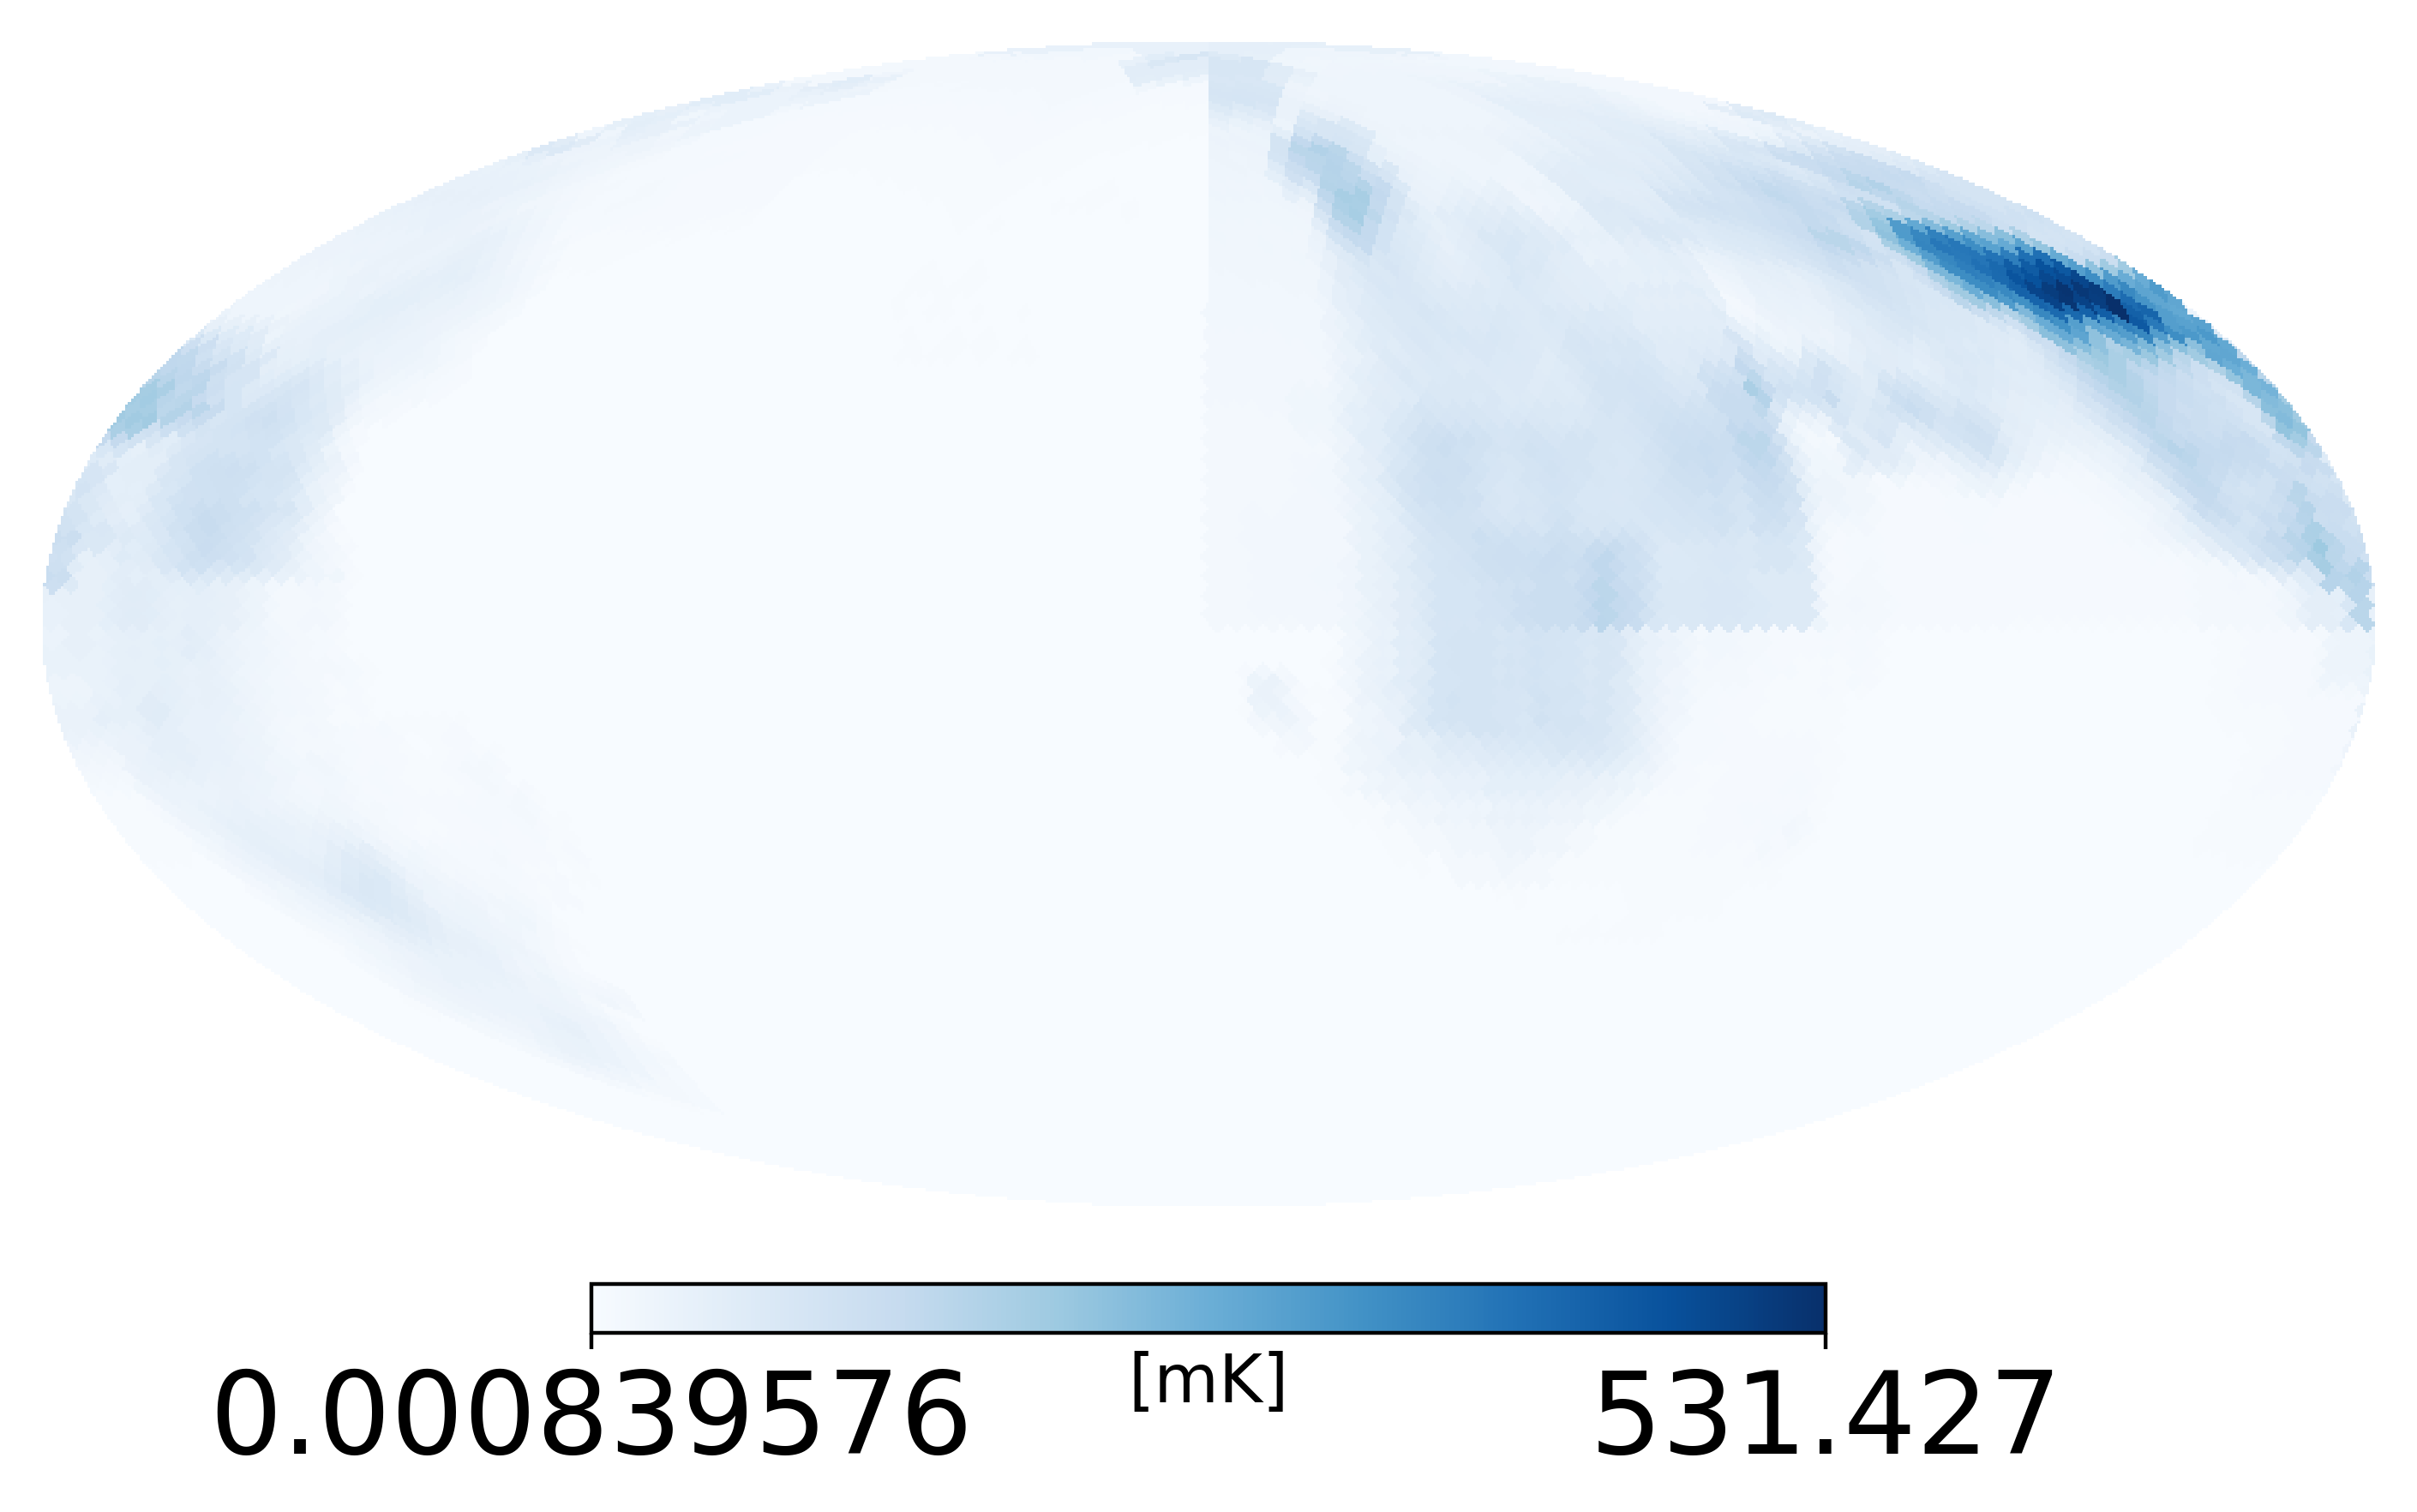

In [26]:
f1 = plt.figure(figsize=(7.5,4.5), dpi=400)
#wmaphaze[np.where(wmaphaze==0)] = -1000
# plot_wmaphaze = wmaphaze.copy()
# plot_wmaphaze[np.where(wmaphaze==0)] = np.nan
hp.mollview(f_aqn, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", min = np.min(f_aqn).value, max = np.max(f_aqn).value
            #min=-0.02,
            #max=270
           )
# plt.savefig("plots/MCMC-results/25k-april1/WMAP Haze Skymap.svg")
fontsize = 24
matplotlib.rcParams.update({'font.size':fontsize})

# save_name = "wmap-skymap-simulated"
# plt.savefig(save_name+".png", bbox_inches='tight')
plt.savefig("../visuals/numerical-skymap"+".svg", bbox_inches='tight')
plt.show()

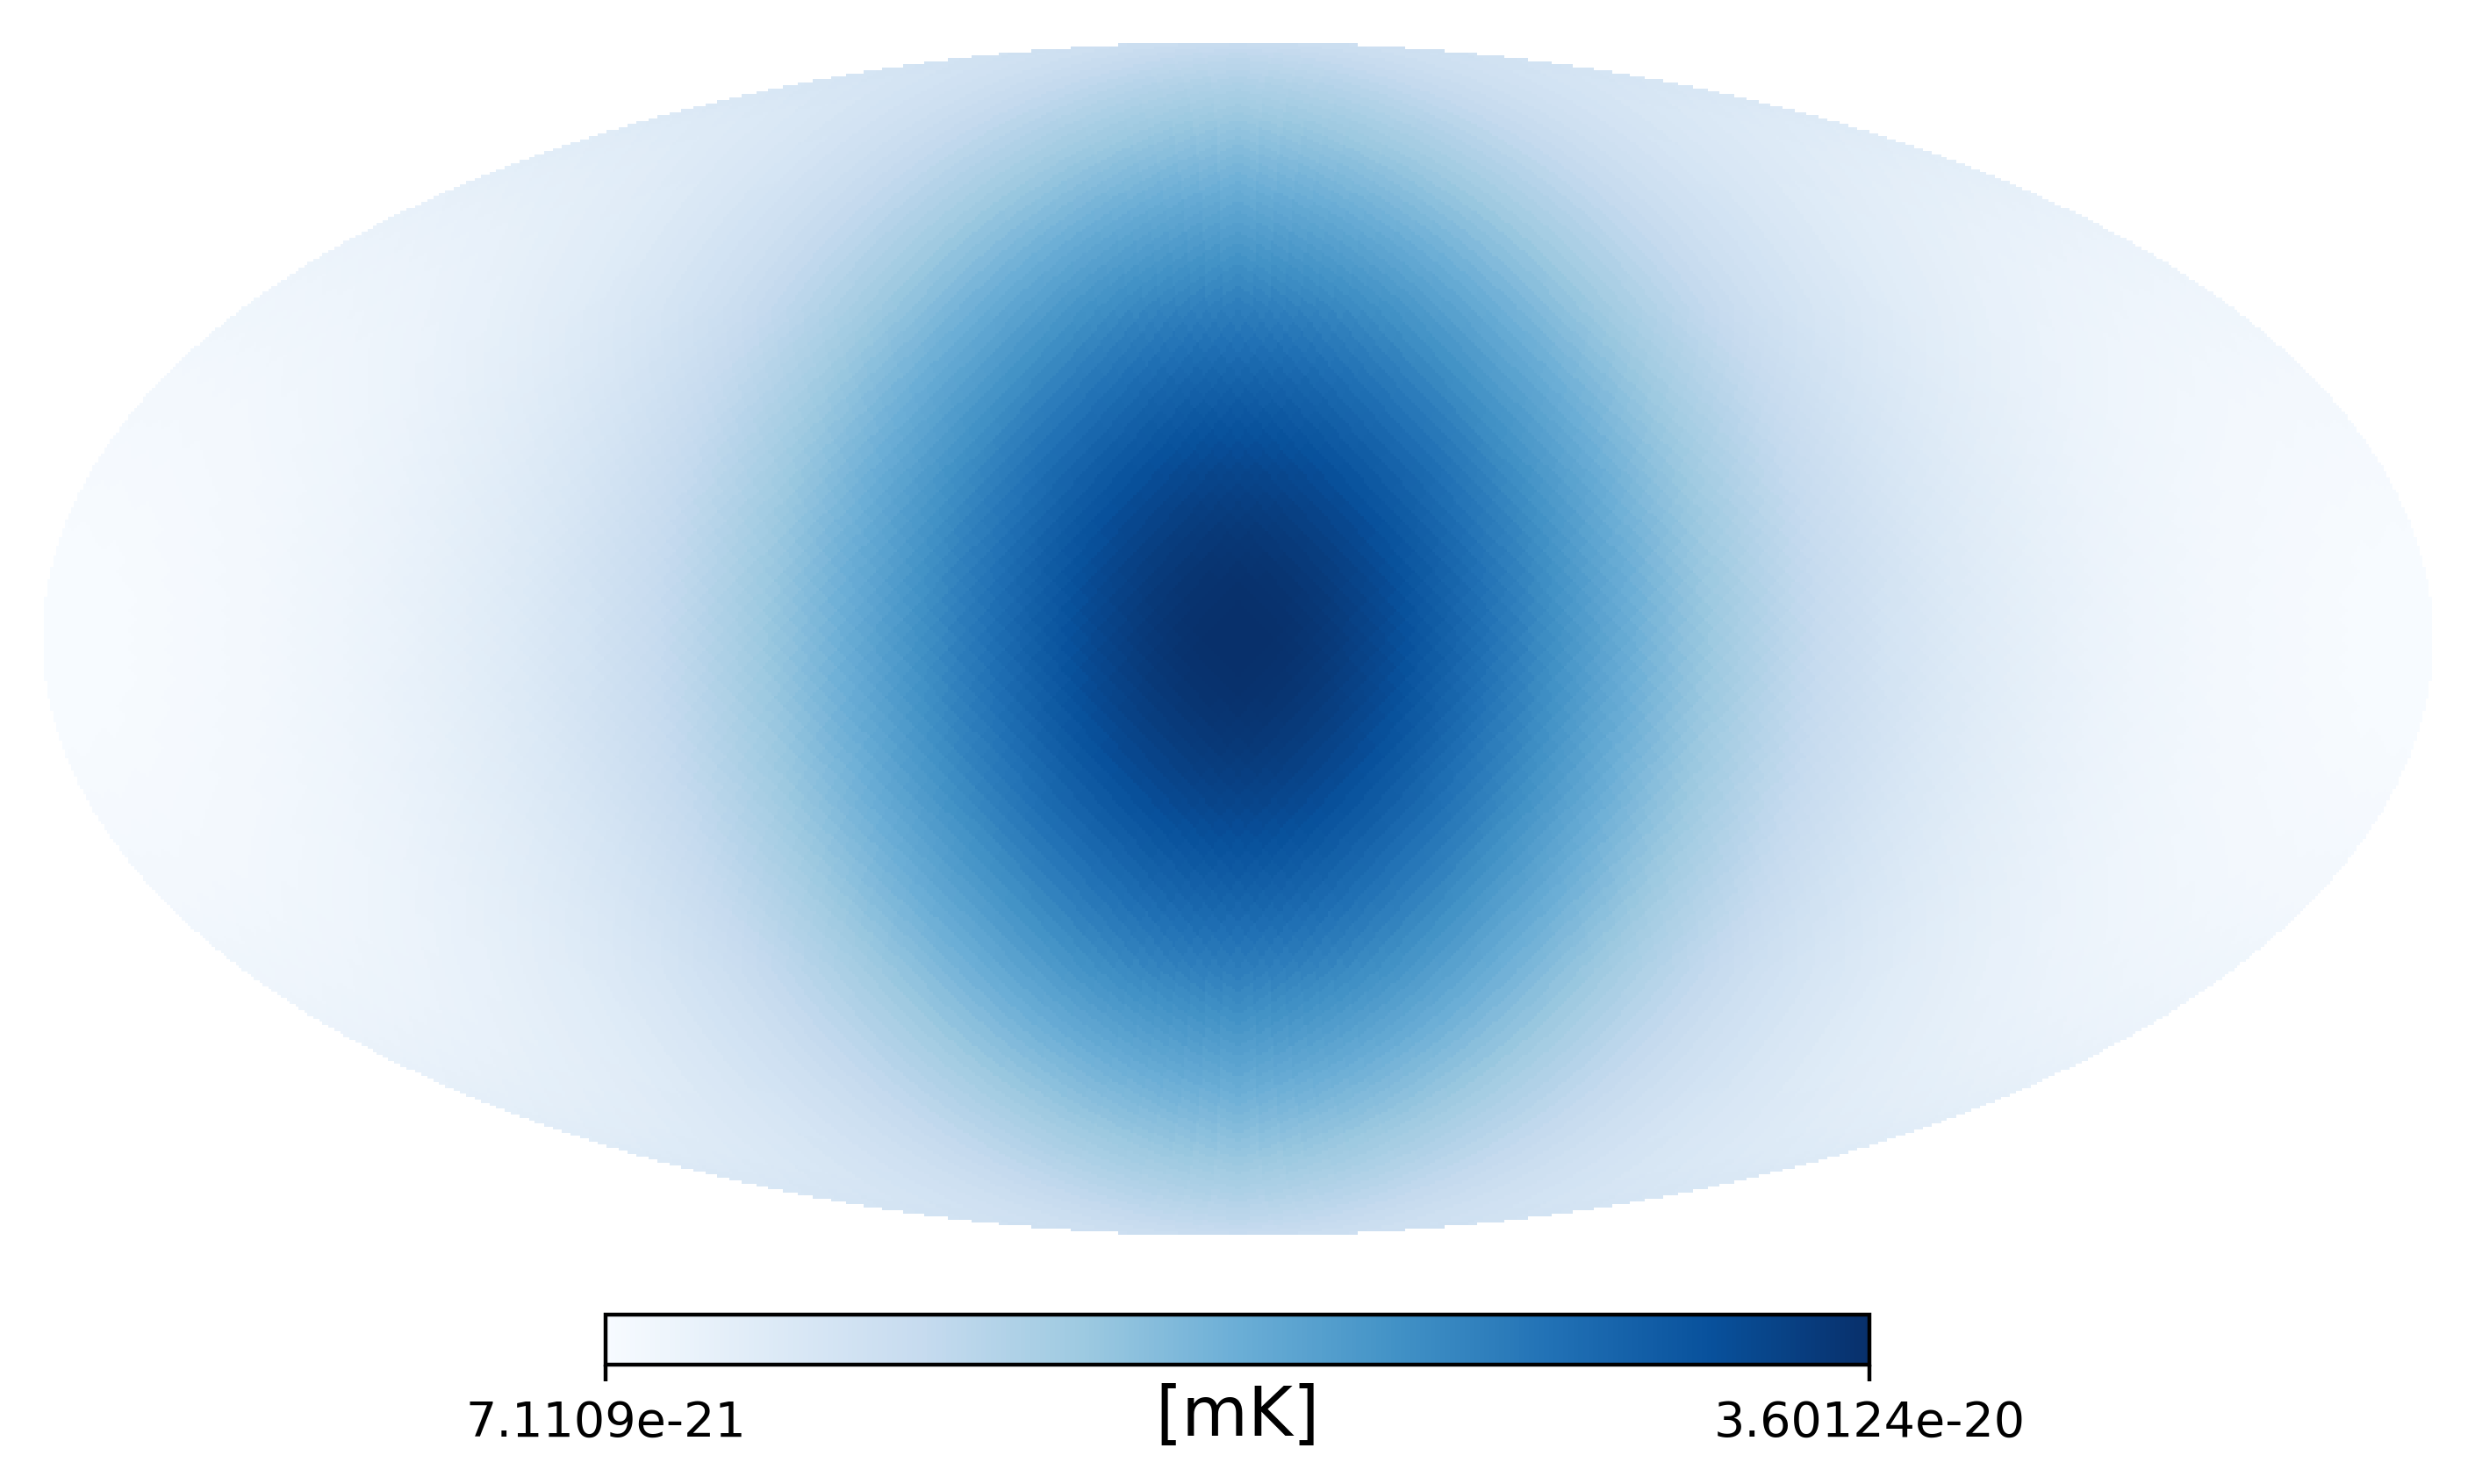

In [16]:
f1 = plt.figure(figsize=(7.5,4.5), dpi=400)
#wmaphaze[np.where(wmaphaze==0)] = -1000
# plot_wmaphaze = wmaphaze.copy()
# plot_wmaphaze[np.where(wmaphaze==0)] = np.nan
hp.mollview(f_aqn, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", min = np.min(f_aqn).value, max = np.max(f_aqn).value
            #min=-0.02,
            #max=270
           )
# plt.savefig("plots/MCMC-results/25k-april1/WMAP Haze Skymap.svg")
fontsize = 24
matplotlib.rcParams.update({'font.size':fontsize})

# save_name = "wmap-skymap-simulated"
# plt.savefig(save_name+".png", bbox_inches='tight')
# plt.savefig(save_name+".svg", bbox_inches='tight')
plt.savefig("../visuals/analytical-skymap"+".svg", bbox_inches='tight')
plt.show()

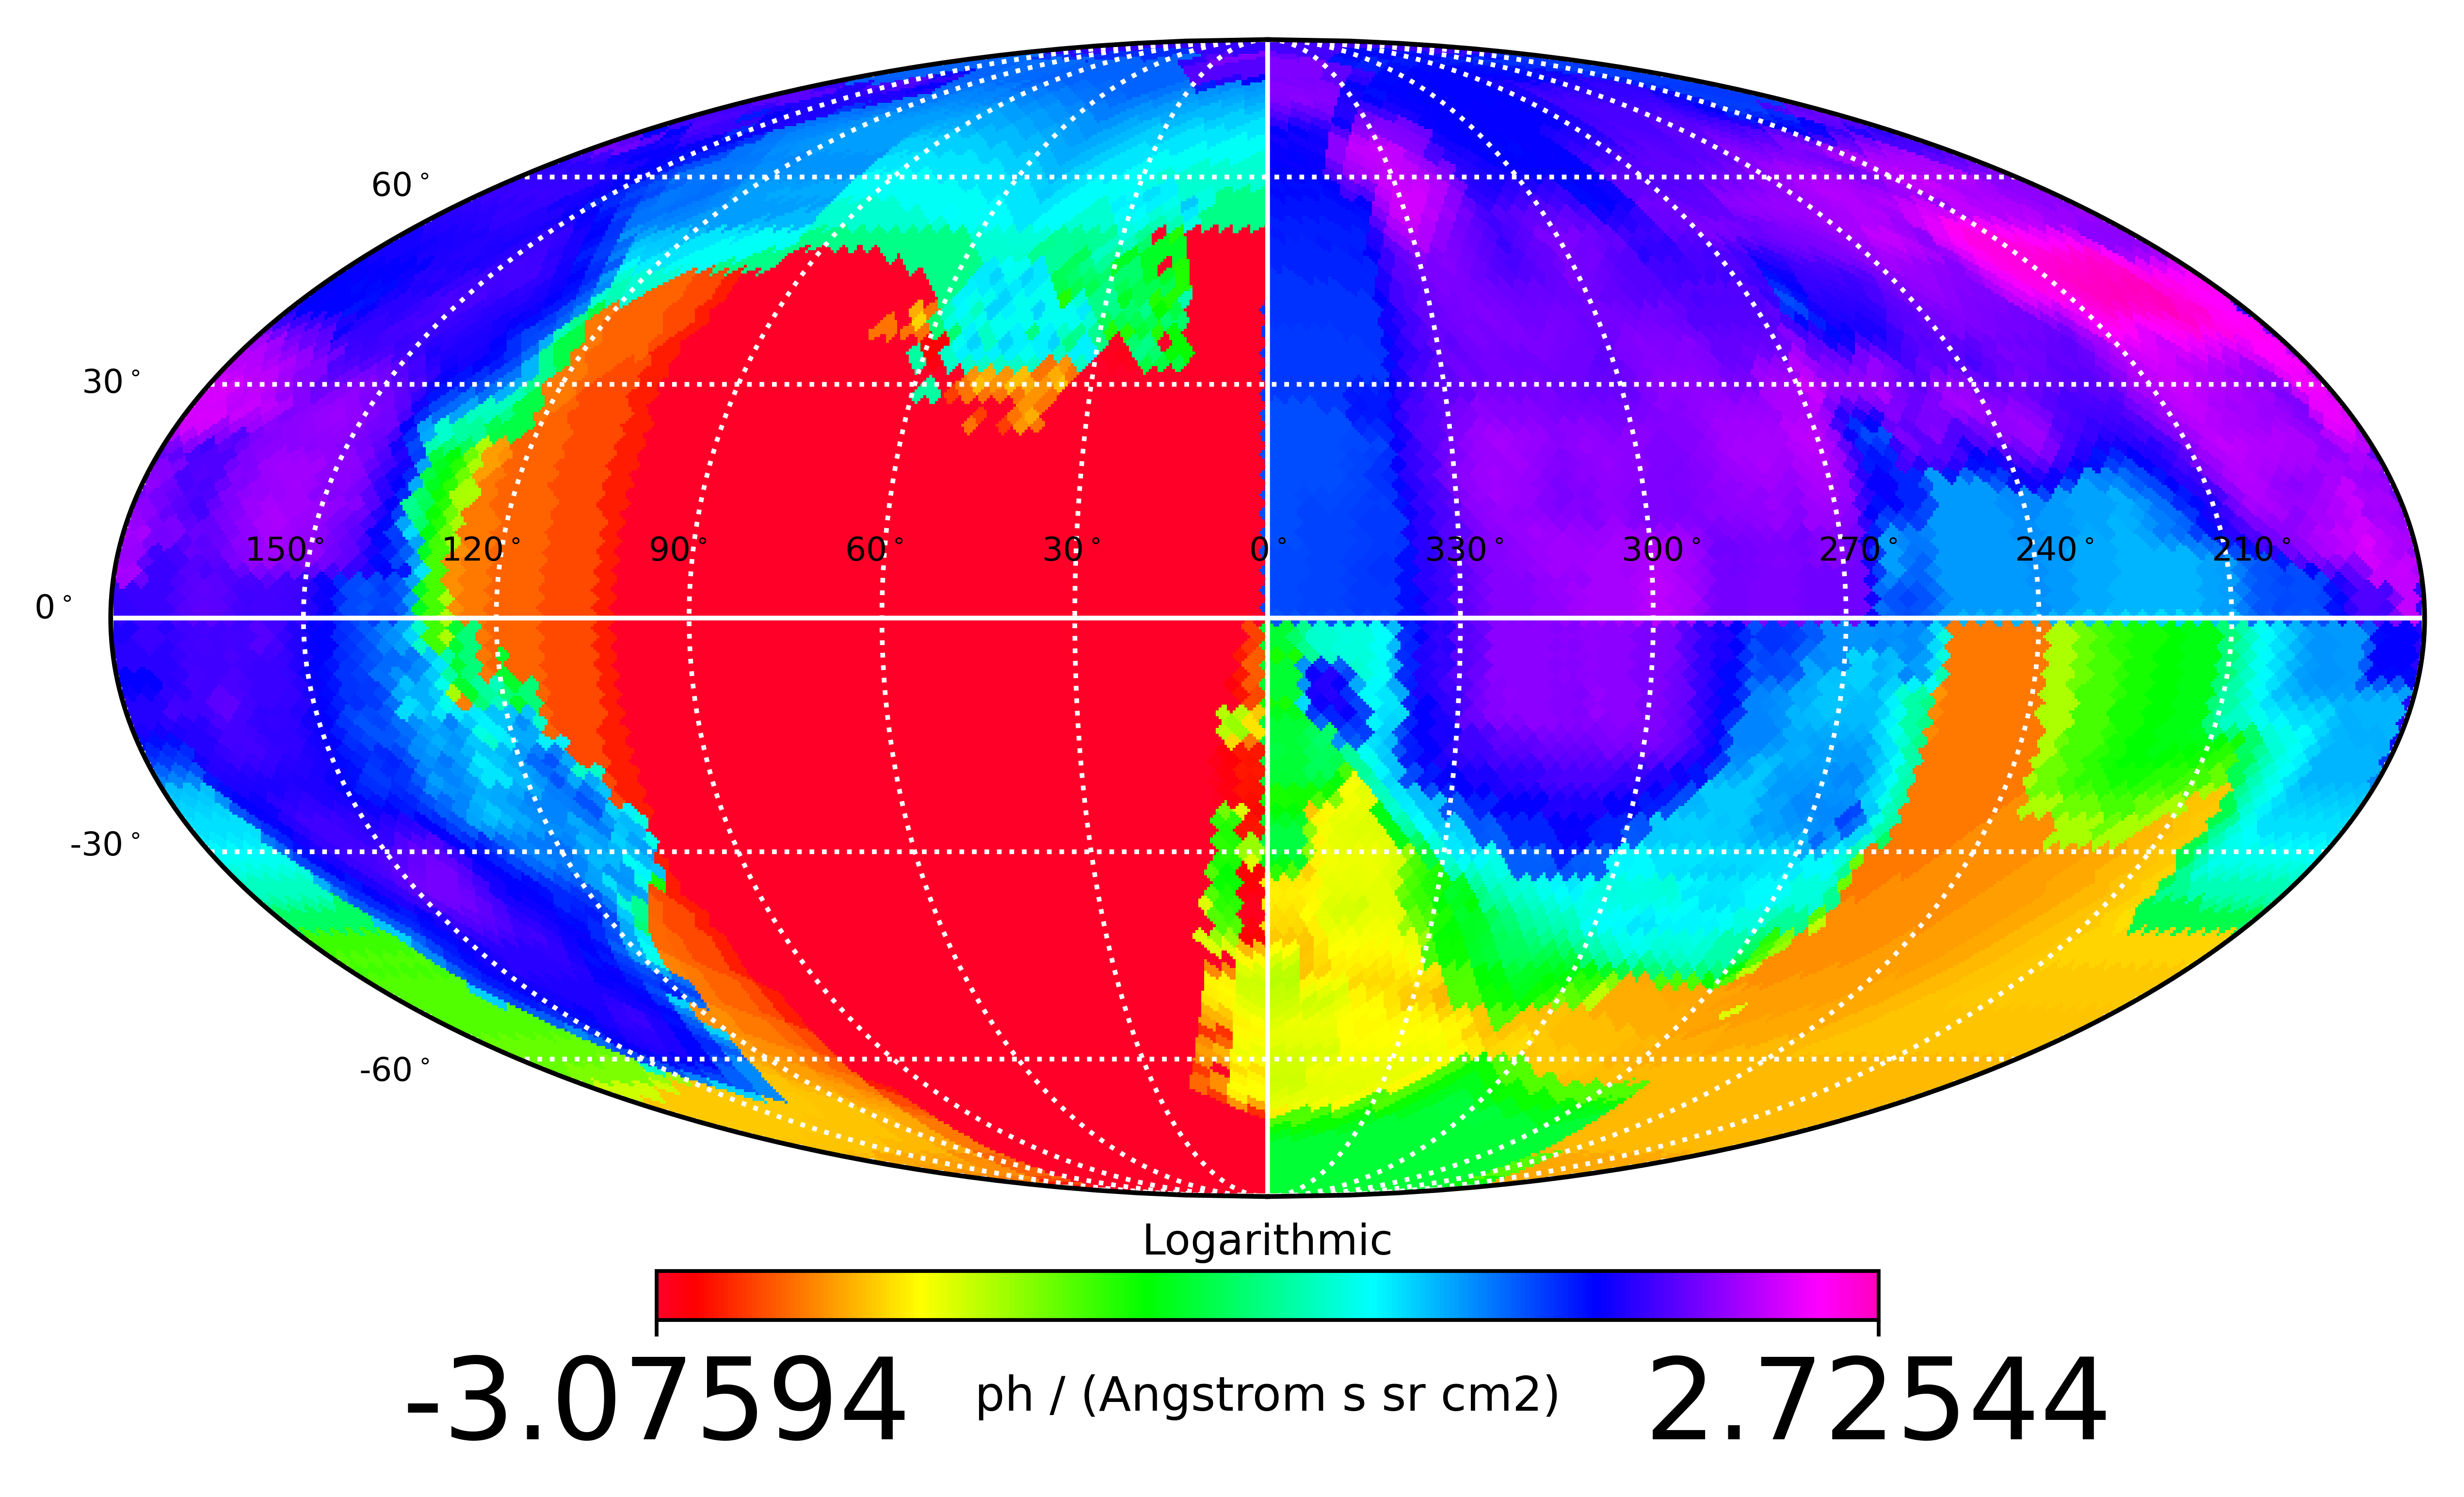

In [27]:
def create_skymap2(signal, signal_unit, log_signal):
    f1 = plt.figure(figsize=(7.5,4.5), dpi=700)
    # rotation in (lat, long, psi)
    if log_signal:
        hp.mollview(np.log10(signal.value), 
                    title="", 
                    rot=(0,0,0),
                    cmap='gist_rainbow', 
                    fig=f1, 
                    unit="")
    else:
        hp.mollview(signal.value, 
                    title="", 
                    rot=(0,0,0),
                    cmap='gist_rainbow', 
                    fig=f1, 
                    unit="")    
    #hp.graticule(dmer=360,dpar=360,alpha=0)  
    hp.graticule(dmer=30,dpar=30, alpha=1, color="white", linewidth=10)
    longitude_labels = [150,120,90,60,30,0,330,300,270,240,210]
    for i in range(len(longitude_labels)):
        plt.text((-5+i)*0.34,0.1,str(longitude_labels[i])+"$^\circ$",size=7,horizontalalignment="center")

    latitude_labels = [-60,-30,0,30,60]
    plt.text(-2.01,-0.41,"-30$^\circ$",size=7,horizontalalignment="center") 
    plt.text(-2.1,0,"0$^\circ$",size=7,horizontalalignment="center")
    plt.text(-2,0.39,"30$^\circ$",size=7,horizontalalignment="center") 
    plt.text(-1.5,0.73,"60$^\circ$",size=7,horizontalalignment="center") 
    plt.text(-1.51,-0.8,"-60$^\circ$",size=7,horizontalalignment="center") 
    if log_signal:
        plt.text(0,-1.10,"Logarithmic",size=9,horizontalalignment="center")
    #plt.text(0,-1.37,"photons$\,\cdot\,$cm$^{-2}\cdot$A$^{-1}\cdot$s$^{-1}\cdot$sr$^{-1}$",size=10,horizontalalignment="center")
    plt.text(0,-1.37,signal_unit,size=10,horizontalalignment="center")
    plt.savefig("simulated_signal_sky_map.png")
    plt.show()

create_skymap2(f_aqn, f_aqn.unit, True)

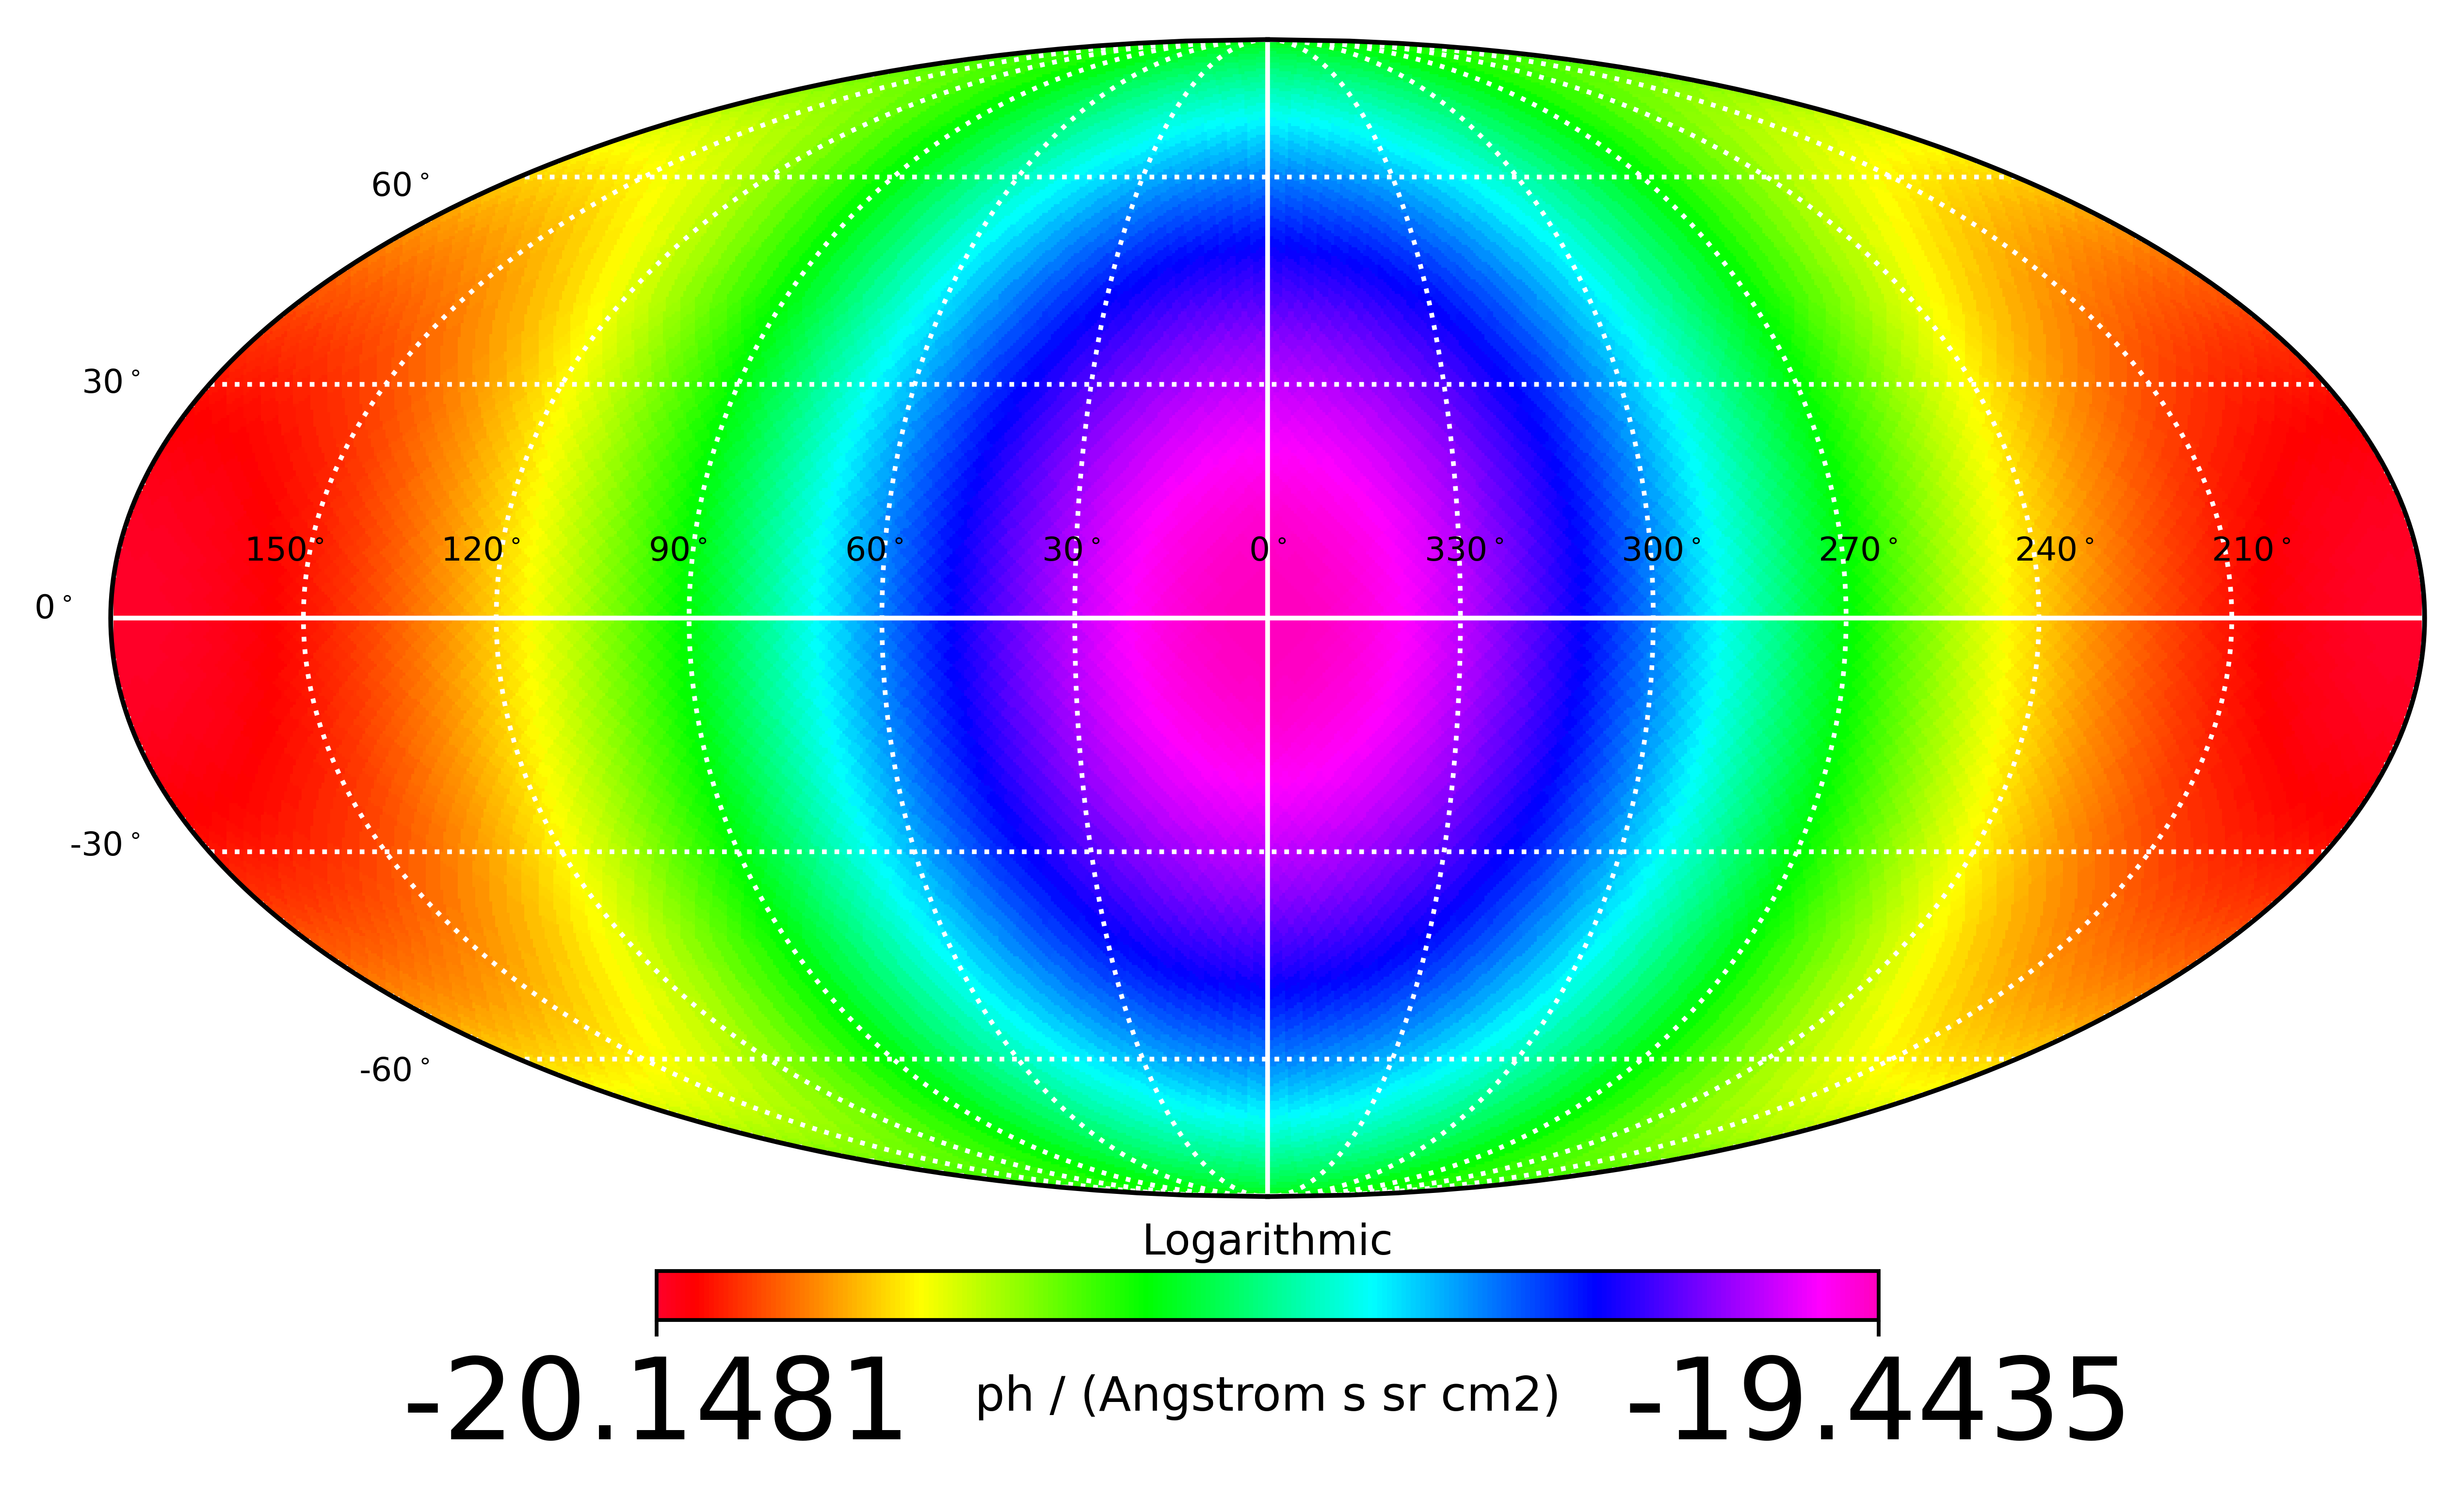

In [17]:
create_skymap2(f_aqn, f_aqn.unit, True)

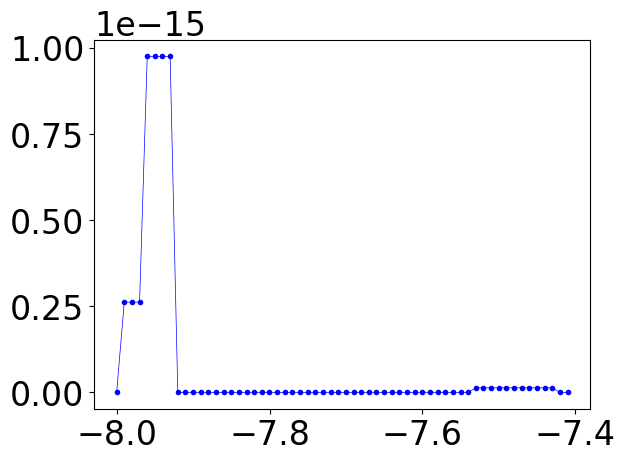

In [26]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)

# plt.figure(dpi=300)
plt.plot(x[:,centre_index], flat_aqn_emit[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)

In [18]:
analy = cubes.copy()

In [33]:
np.shape(cubes["temp_ion"])

(512, 512, 512)

In [62]:
R_aqn_cm

<Quantity 1.89647788e-05 cm>

In [60]:
cubes["r_eff"] = R_eff(R_aqn_cm,cubes["t_aqn_i"],cubes["temp_ion"]).to(u.cm)

In [57]:
analy["r_eff"] = R_eff(R_aqn_cm,analy["t_aqn_i"],analy["temp_ion"]).to(u.cm)

[1.59787579e-25 1.59787579e-25 1.59787579e-25 1.59787579e-25] 1 / cm3
[0.00529255 0.00529255 0.00529255 0.00529255] 1 / cm3
[0.00187668 0.00187668 0.00187668 0.00187668] 1 / cm3
[3.08555301 3.08555301 3.08555301 3.08555301] eV
[0.00119265 0.00119265 0.00119265 0.00119265]
[0.00136794 0.00136794 0.00136794 0.00136794]
[2.56562985 2.56562985 2.56562985 2.56562985] eV
[0.08924132 0.08924132 0.08924132 0.08924132] eV
[9.75064843e-16 9.75064843e-16 9.75064843e-16 9.75064843e-16] ph / (Angstrom s sr cm3)
[0.02769154 0.02769154 0.02769154 0.02769154] cm
Numerical:
dark_mat [1.59787579e-25 1.59787579e-25 1.59787579e-25 1.59787579e-25] 1 / cm3
neut_gas [0.00529255 0.00529255 0.00529255 0.00529255] 1 / cm3
ioni_gas [0.00187668 0.00187668 0.00187668 0.00187668] 1 / cm3
temp_ion [3.08555301 3.08555301 3.08555301 3.08555301] eV
dv_ioni [0.00119265 0.00119265 0.00119265 0.00119265]
dv_neut [0.00136794 0.00136794 0.00136794 0.00136794]
t_aqn_i [2.56562985 2.56562985 2.56562985 2.56562985] eV
t_aqn_n 

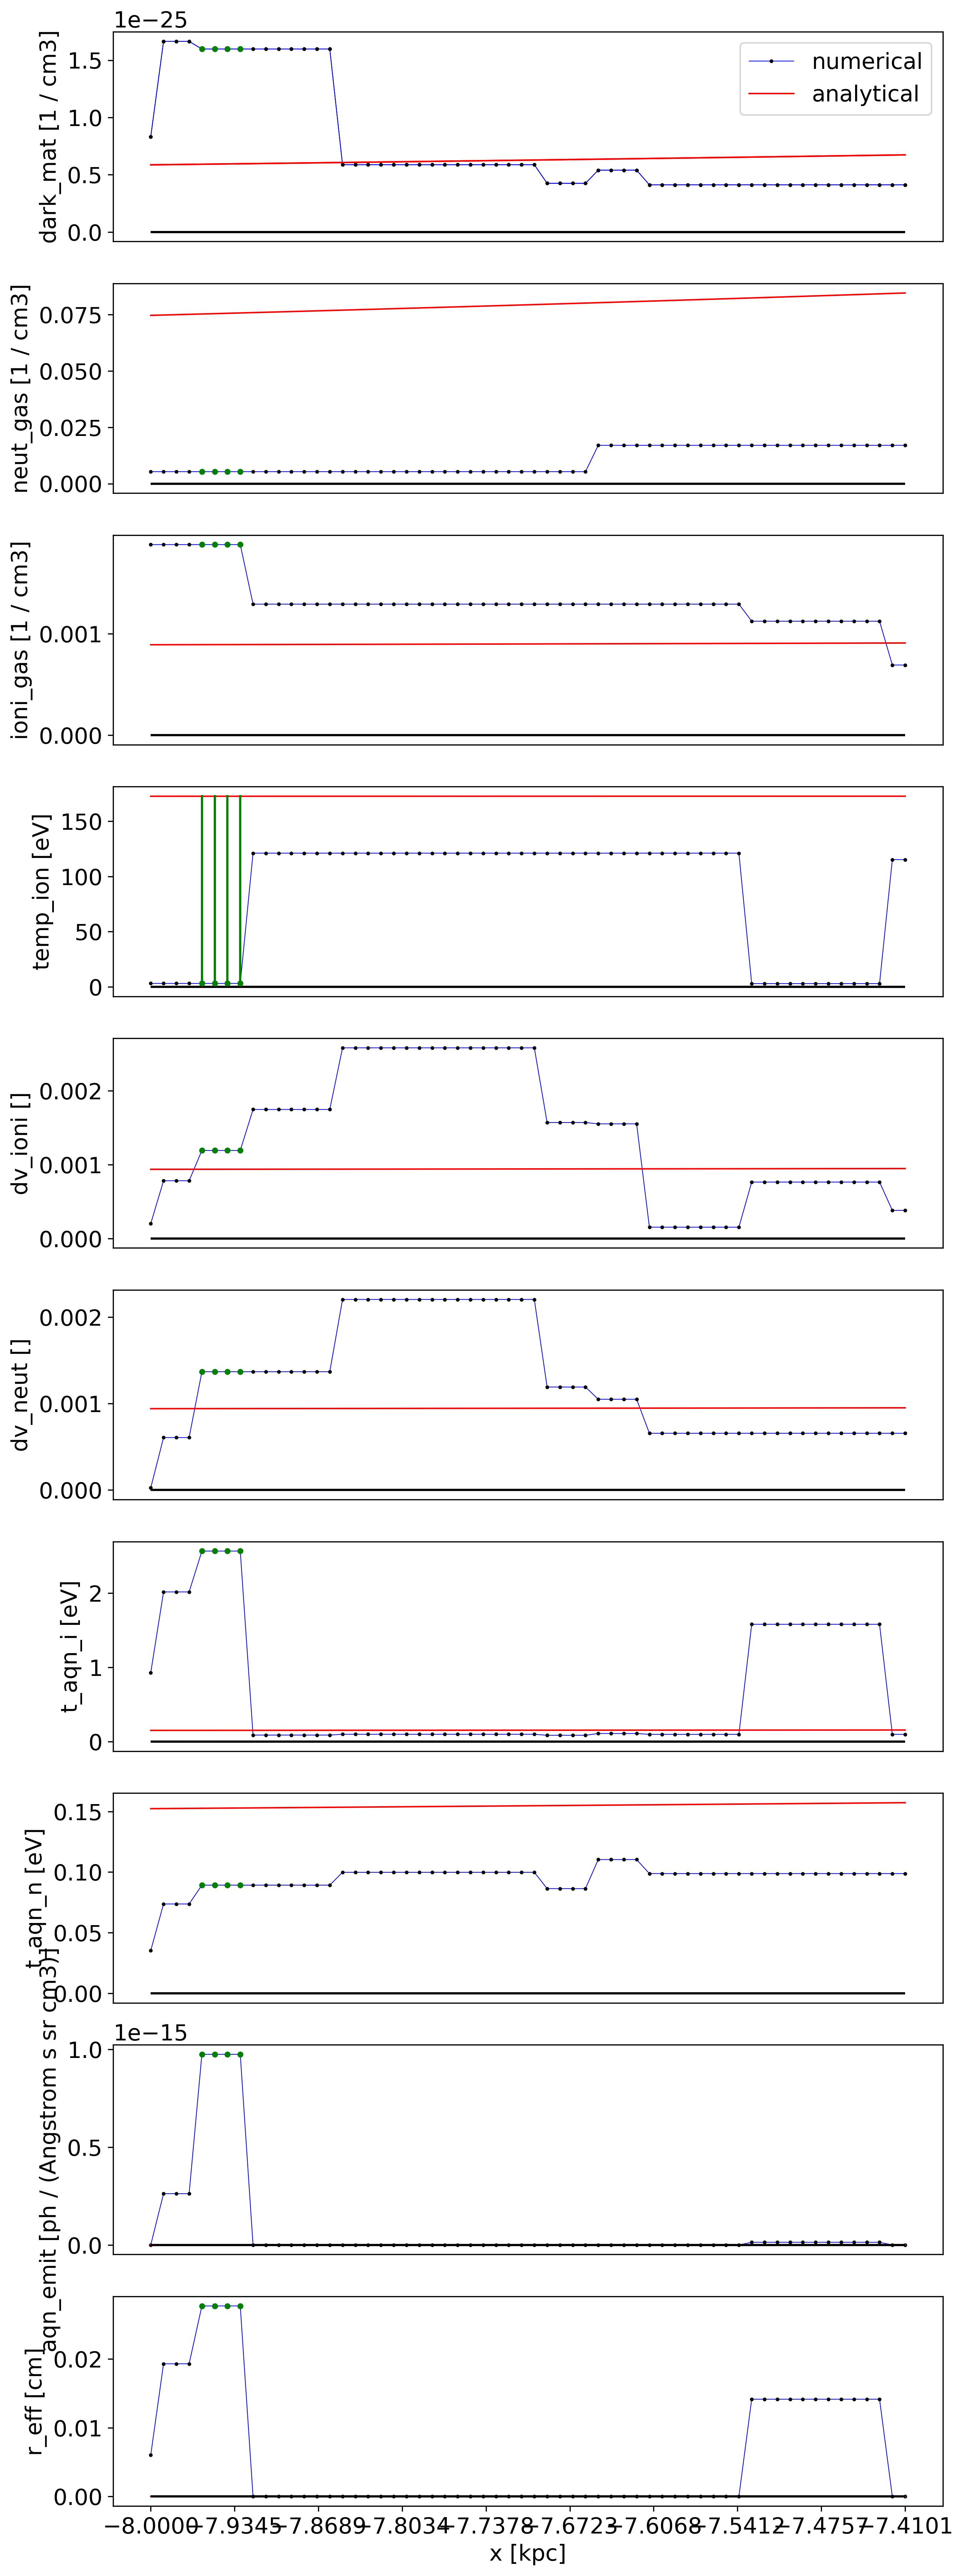

In [61]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)
quantities = ["dark_mat", "neut_gas", "ioni_gas", "temp_ion", "dv_ioni", "dv_neut", "t_aqn_i", "t_aqn_n", "aqn_emit", "r_eff"]

fig, axs = plt.subplots(len(quantities), 1, dpi=300, figsize=(10,3*len(quantities)))

for i, quantity in enumerate(quantities):
    flat_cube = np.reshape(cubes[quantity],(cube_dimension**3))
    axs[i].plot(x[:,centre_index], flat_cube[cube_indexes[:,centre_index]], linewidth=0.5, marker='.', color='b', markerfacecolor='k', markeredgecolor='k', markersize=3)
    axs[i].plot(x[:,centre_index], analy[quantity][:,centre_index],       "r-", linewidth=1)
    axs[i].hlines(0, np.min(x[:,centre_index]), np.max(x[:,centre_index]), color="black")
    axs[i].set_xticks([])
    axs[i].set_ylabel(quantity + " [" + str(cubes[quantity].unit) + "]", size=15)
    axs[i].tick_params(axis='both', labelsize=15)
    text = axs[i].yaxis.get_offset_text()
    text.set_size(15)
    # axs[i].set_xticklabels(size=10)

axs[i].set_xticks(np.linspace(np.min(x[:,centre_index]), np.max(x[:,centre_index]), 10))
axs[i].set_xlabel("x [kpc]", size=15)

flat_cube = np.reshape(cubes[quantities[0]],(cube_dimension**3))
axs[0].plot(x[:,centre_index], flat_cube[cube_indexes[:,centre_index]], linewidth=0.5, marker='.', color='b', markerfacecolor='k', markeredgecolor='k', markersize=3, label="numerical")
axs[0].plot(x[:,centre_index], analy[quantities[0]][:,centre_index],       "r-", linewidth=1, label="analytical")
axs[0].legend(fontsize=15)


flat_cube = np.reshape(cubes[quantities[6]],(cube_dimension**3))
max_t_loc = flat_cube[cube_indexes[:,centre_index]] == np.max(flat_cube[cube_indexes[:,centre_index]])
for i, quantity in enumerate(quantities):
    flat_cube = np.reshape(cubes[quantities[i]],(cube_dimension**3))
    print(flat_cube[cube_indexes[:,centre_index]][max_t_loc])
    axs[i].plot(x[:,centre_index][max_t_loc], flat_cube[cube_indexes[:,centre_index]][max_t_loc], "g.")
# axs[6].plot()

print("Numerical:")
for i, quantity in enumerate(quantities):
    flat_cube = np.reshape(cubes[quantity],(cube_dimension**3))
    print(quantity, flat_cube[cube_indexes[:,centre_index]][max_t_loc])
print("------------------------")
print("Analytical:")
for i, quantity in enumerate(quantities):
    print(quantity, analy[quantity][:,centre_index][max_t_loc])

flat_cube = np.reshape(cubes[quantities[3]],(cube_dimension**3))
axs[3].plot([x[:,centre_index][max_t_loc], x[:,centre_index][max_t_loc]], [flat_cube[cube_indexes[:,centre_index]][max_t_loc], analy[quantities[3]][:,centre_index][max_t_loc]], "g-")

print(T_AQN_ionized2(0.029*(1/u.cm**3), 0.003, f, g, 2.59*u.eV, R_aqn_cm))

plt.savefig("../visuals/central_sightline_integral_UV.svg", bbox_inches="tight")
plt.show()


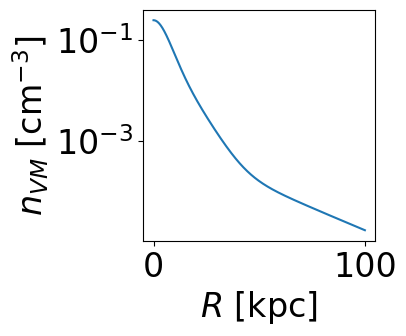

In [111]:

############# gas components ######################################### 

[a1_c, b1_c, c1_c, 
 a2_c, b2_c, c2_c, 
 a3_c, b3_c, c3_c, 
 a4_c, b4_c, c4_c, 
 a5_c, b5_c, c5_c, 
 a6_c, b6_c, c6_c] = [30.04649796,  0.4079755,  3.77607598,  
              1e3,3e-1,15,
             2.6e4,5e-2,3,
             0,0,0,
             0,0,0,
             0,0,0,]

[a1_w, b1_w, c1_w, 
 a2_w, b2_w, c2_w, 
 a3_w, b3_w, c3_w, 
 a4_w, b4_w, c4_w, 
 a5_w, b5_w, c5_w, 
 a6_w, b6_w, c6_w] = [1.1e0,1e-1,0.22,
              1.7e1,12e-1,110,
              0.575e4,8.2e-2,13.7,
             0,0,0,
             0,0,0,
             0,0,0,]

[a1_wh, b1_wh, c1_wh, 
 a2_wh, b2_wh, c2_wh, 
 a3_wh, b3_wh, c3_wh, 
 a4_wh, b4_wh, c4_wh, 
 a5_wh, b5_wh, c5_wh, 
 a6_wh, b6_wh, c6_wh] = [6.1e1,4.4e-1,1.8,
              9e2,9.2e-2,2.8,
              1.5e4,7e-2,9,
             0,0,0,
             0,0,0,
             0,0,0,]

[a1_h, b1_h, c1_h, 
 a2_h, b2_h, c2_h, 
 a3_h, b3_h, c3_h, 
 a4_h, b4_h, c4_h, 
 a5_h, b5_h, c5_h, 
 a6_h, b6_h, c6_h] = [2e2,4e-1,9.5,
              1e4,10e-2,6,
              2.6e4,3e-2,3.1,
              0,0,0,
              0,0,0,
              0,0,0,]

from astropy.cosmology import WMAP7             # WMAP 7-year cosmology
rho_crit_z05_cgs = WMAP7.critical_density(0.5)  # critical density at z = 0.5  
rho_crit_z05_si = rho_crit_z05_cgs.to(u.kg / u.m**3)
r_vir_kpc = 233 * u.kpc

def rho_gas_component(R_kpc,gas_component):
    x = (R_kpc/r_vir_kpc).value
    if gas_component == "cold":
        return  (a1_c / (1+(x/b1_c)**2)**c1_c + \
                 a2_c / (1+(x/b2_c)**2)**c2_c + \
                 a3_c / (1+(x/b3_c)**2)**c3_c) * rho_crit_z05_si
    if gas_component == "warm":
        return  (a1_w / (1+(x/b1_w)**2)**c1_w + \
                 a2_w / (1+(x/b2_w)**2)**c2_w + \
                 a3_w / (1+(x/b3_w)**2)**c3_w) * rho_crit_z05_si
    if gas_component == "warm-hot":
        return  (a1_wh / (1+(x/b1_wh)**2)**c1_wh + \
                 a2_wh / (1+(x/b2_wh)**2)**c2_wh + \
                 a3_wh / (1+(x/b3_wh)**2)**c3_wh) * rho_crit_z05_si 
    if gas_component == "hot":
        return  (a1_h / (1+(x/b1_h)**2)**c1_h + \
                 a2_h / (1+(x/b2_h)**2)**c2_h + \
                 a3_h / (1+(x/b3_h)**2)**c3_h) * rho_crit_z05_si 

def n_gas_component(R_none, gas_component):
    return rho_gas_component(R_none*u.kpc, gas_component) / cst.m_p.si


def rho_gas(R_none):
    return rho_gas_component(R_none,"cold")# + rho_gas_component(R_none,"warm") + rho_gas_component(R_none,"warm-hot") + rho_gas_component(R_none,"hot")

def n_vm(R_none):
    return rho_gas(R_none) / cst.m_p.si

ionized_gas = True
########################################################################

# if disp:
plt.figure(dpi=100,figsize=(3,3))
plt.plot(np.arange(l_min,1e2,0.1), n_vm(np.arange(l_min,1e2,0.1)).to(1/u.cm**3))
plt.xlabel("$R$ [kpc]")
plt.ylabel("$n_{VM}$ [cm$^{-3}$]")
plt.yscale("log")
# plt.xscale("log")
# plt.title(vm_model, size=15)
#plt.savefig(dm_model_name+".png", bbox_inches='tight')
plt.show()





In [108]:
n_vm(np.arange(l_min,1e3,0.1)).to()

<Quantity [2.47678935e+05, 2.47626000e+05, 2.47467287e+05, ...,
           5.69779741e-06, 5.69362198e-06, 5.68945004e-06] 1 / m3>

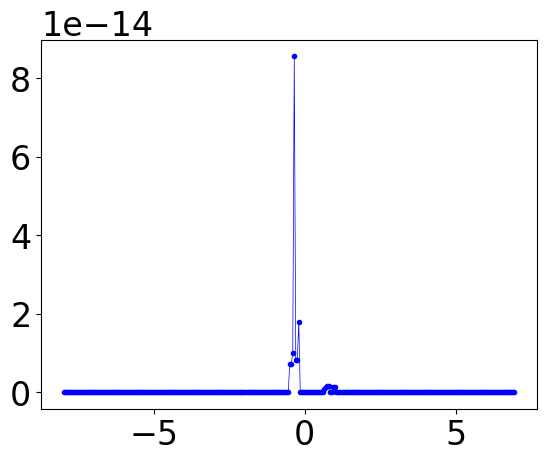

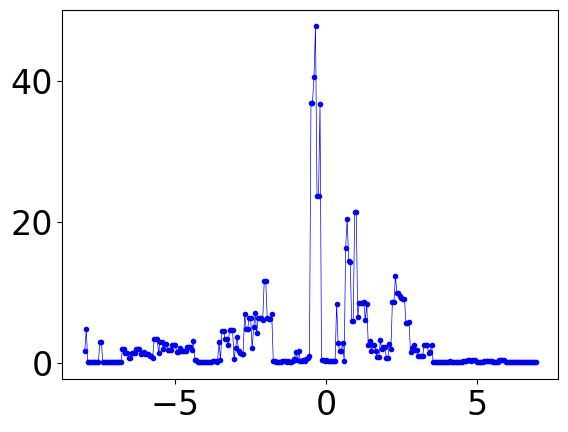

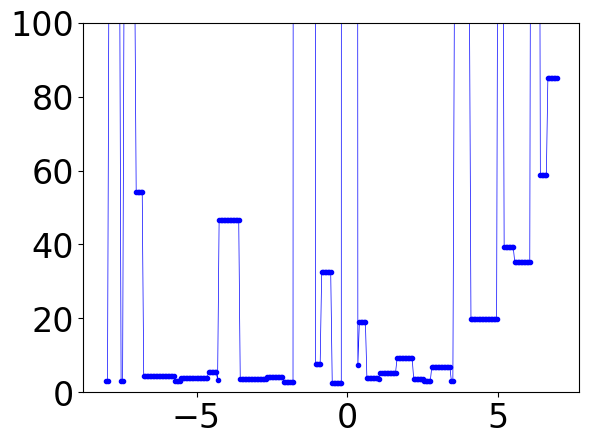

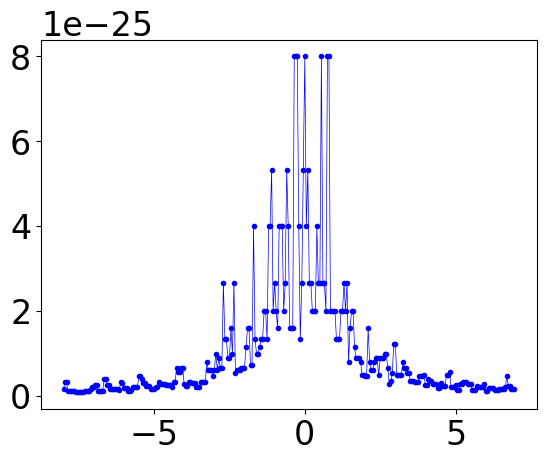

In [28]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)

# plt.figure(dpi=300)
plt.plot(x[:,centre_index], flat_aqn_emit[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
# plt.ylim(0,1e-16)
plt.show()

flat  = np.reshape(cubes["t_aqn_i"],(cube_dimension**3))
plt.plot(x[:,centre_index], flat[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
plt.show()

flat  = np.reshape(cubes["temp_ion"],(cube_dimension**3))
plt.plot(x[:,centre_index], flat[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
plt.ylim(0,100)
plt.show()

flat  = np.reshape(cubes["dark_mat"],(cube_dimension**3))
plt.plot(x[:,centre_index], flat[cube_indexes[:,centre_index]], "b.-", linewidth=0.5)
plt.show()



In [83]:
centre_index = hp.ang2pix(NSIDE, theta=np.pi/2, phi=0)
plt.plot(x[:,centre_index], cubes["aqn_emit"][:,centre_index], "b.-", linewidth=0.5)
plt.show()

IndexError: index 5952 is out of bounds for axis 1 with size 512

In [28]:
R[:,centre_index]

array([8.        , 7.00024804, 6.00057874, 5.00104167, 4.00173592,
       3.00289244, 2.00520213, 1.01208112, 0.16667571, 1.01550647,
       2.00866274, 3.00635969, 4.00520551, 5.00451234, 6.00405   ])

In [40]:
x[:,centre_index]

array([-8.00000000e+00, -7.00021704e+00, -6.00043407e+00, -5.00065111e+00,
       -4.00086815e+00, -3.00108519e+00, -2.00130222e+00, -1.00151926e+00,
       -1.73629953e-03,  9.98046663e-01,  1.99782963e+00,  2.99761259e+00,
        3.99739555e+00,  4.99717851e+00,  5.99696148e+00])

In [31]:
z[:,centre_index]

array([0.        , 0.02083333, 0.04166667, 0.0625    , 0.08333333,
       0.10416667, 0.125     , 0.14583333, 0.16666667, 0.1875    ,
       0.20833333, 0.22916667, 0.25      , 0.27083333, 0.29166667])

In [21]:
np.shape(R)

(15, 12288)

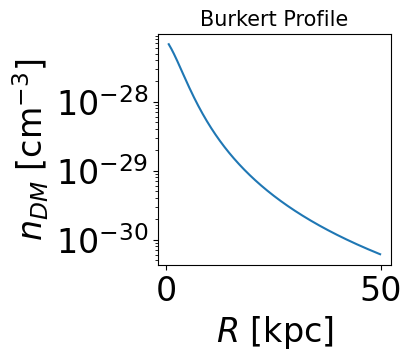

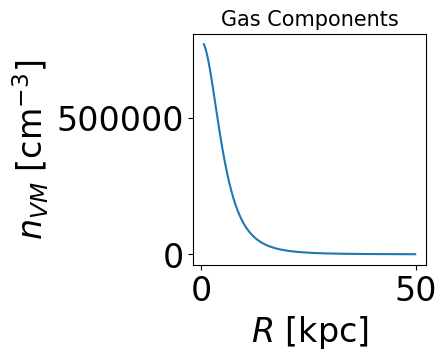

NSIDE is 32
NPIX is 12288
dOmega is 0.0010226538585904274
[[1.18918529e-20 1.15854849e-20 1.15854849e-20 ... 1.15854849e-20
  1.15854849e-20 1.18918529e-20]
 [1.12765772e-20 1.07518833e-20 1.07518833e-20 ... 1.07518833e-20
  1.07518833e-20 1.12765772e-20]
 [1.03025829e-20 9.61722916e-21 9.61722916e-21 ... 9.61722916e-21
  9.61722916e-21 1.03025829e-20]
 ...
 [1.00612265e-27 9.60541100e-28 9.60541100e-28 ... 9.60541100e-28
  9.60541100e-28 1.00612265e-27]
 [9.28798701e-28 8.87549047e-28 8.87549047e-28 ... 8.87549047e-28
  8.87549047e-28 9.28798701e-28]
 [8.58807557e-28 8.21436810e-28 8.21436810e-28 ... 8.21436810e-28
  8.21436810e-28 8.58807557e-28]] mK / cm
[[1.18918529e-20 1.15854849e-20 1.15854849e-20 ... 1.15854849e-20
  1.15854849e-20 1.18918529e-20]
 [1.12765772e-20 1.07518833e-20 1.07518833e-20 ... 1.07518833e-20
  1.07518833e-20 1.12765772e-20]
 [1.03025829e-20 9.61722916e-21 9.61722916e-21 ... 9.61722916e-21
  9.61722916e-21 1.03025829e-20]
 ...
 [1.00612265e-27 9.60541100e-28 

In [156]:
F_tot_galex = simulate_signal(m_aqn_kg)

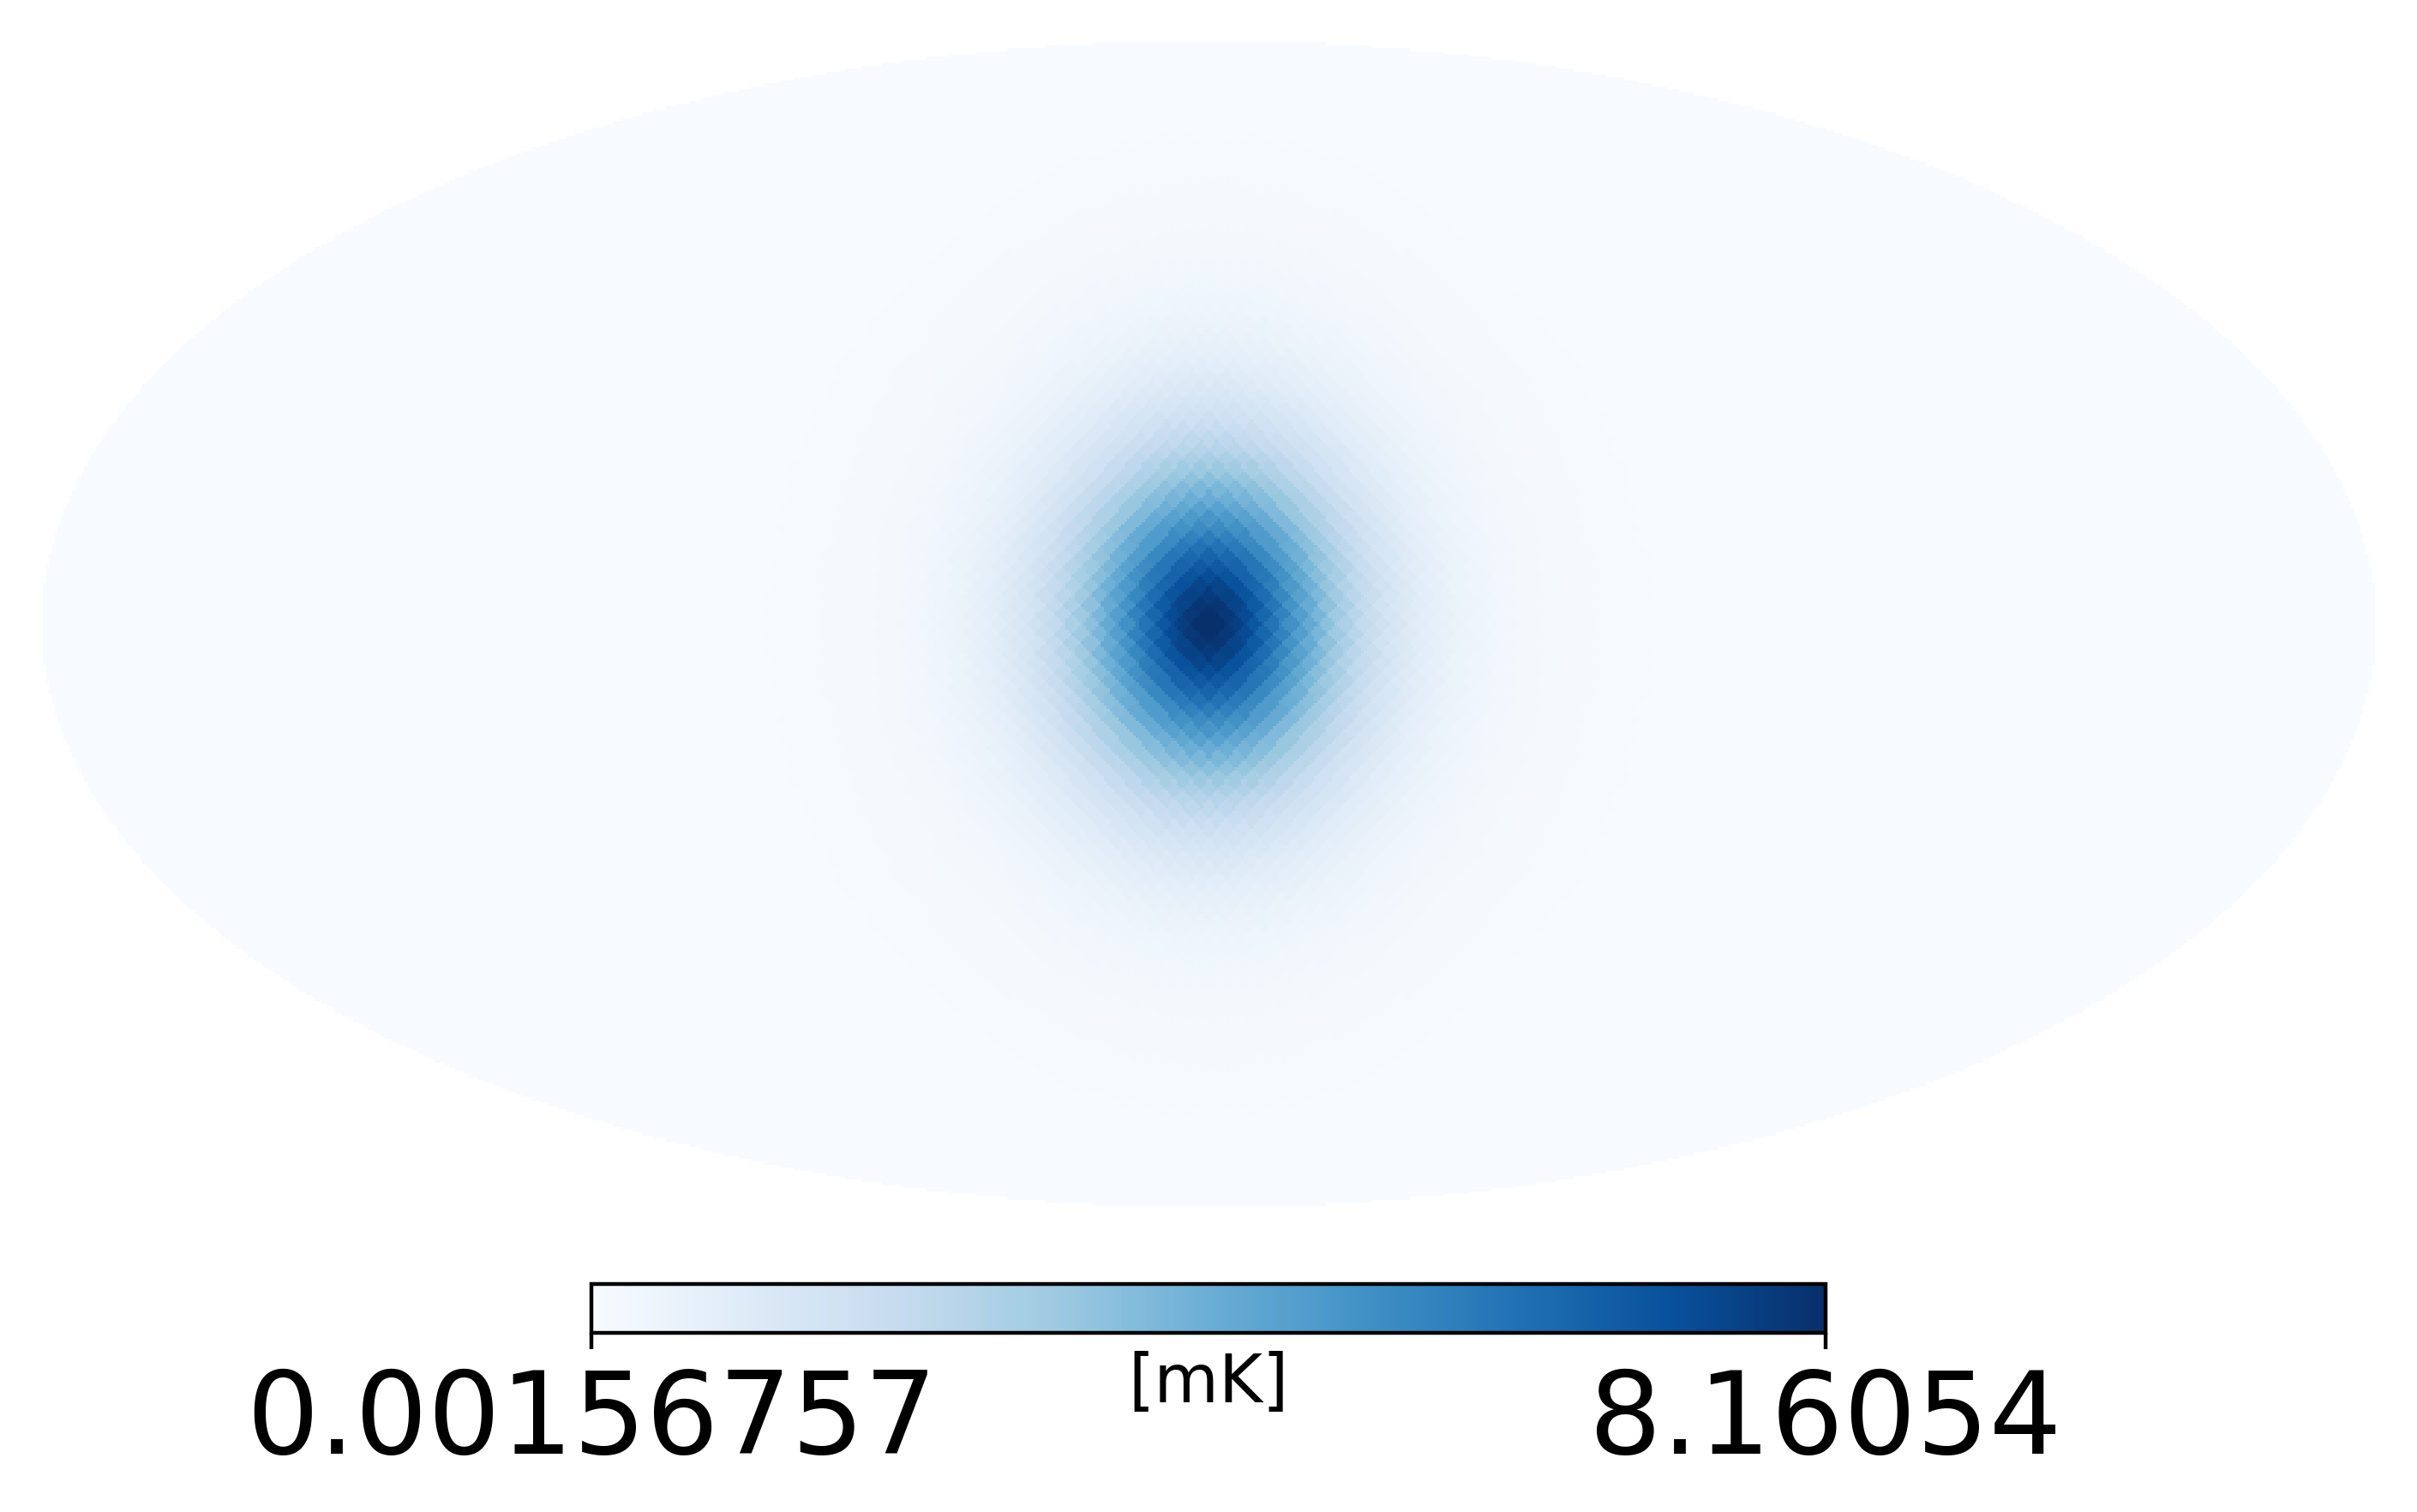

In [204]:
f1 = plt.figure(figsize=(7.5,4.5), dpi=400)
#wmaphaze[np.where(wmaphaze==0)] = -1000
# plot_wmaphaze = wmaphaze.copy()
# plot_wmaphaze[np.where(wmaphaze==0)] = np.nan
hp.mollview(F_tot_galex, 
            title="", 
            rot=(0,0,0),
            cmap='Blues', 
            fig=f1, 
            unit="[mK]", min = np.min(F_tot_galex).value, max = np.max(F_tot_galex).value
            #min=-0.02,
            #max=270
           )
# plt.savefig("plots/MCMC-results/25k-april1/WMAP Haze Skymap.svg")
fontsize = 24
matplotlib.rcParams.update({'font.size':fontsize})

# save_name = "wmap-skymap-simulated"
# plt.savefig(save_name+".png", bbox_inches='tight')
# plt.savefig(save_name+".svg", bbox_inches='tight')
plt.show()